In [1]:
from functions import utils_plot
from functions import utils_get
from functions import utils_shift
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Read MOER data

In [2]:
df_moer = pd.read_csv("./moer/moer_15.csv")
df_moer.head()

,datetime,value,moer
0,2023-01-01 00:00:00+00:00,997.000000,452.638000
1,2023-01-01 00:15:00+00:00,995.000000,451.730000
2,2023-01-01 00:30:00+00:00,995.333333,451.881333
3,2023-01-01 00:45:00+00:00,995.333333,451.881333
4,2023-01-01 01:00:00+00:00,987.000000,448.098000


In [3]:
df_moer['datetime'] = pd.to_datetime(df_moer['datetime'])
df_moer['datetime'] = df_moer['datetime'].dt.tz_convert('America/Los_Angeles')

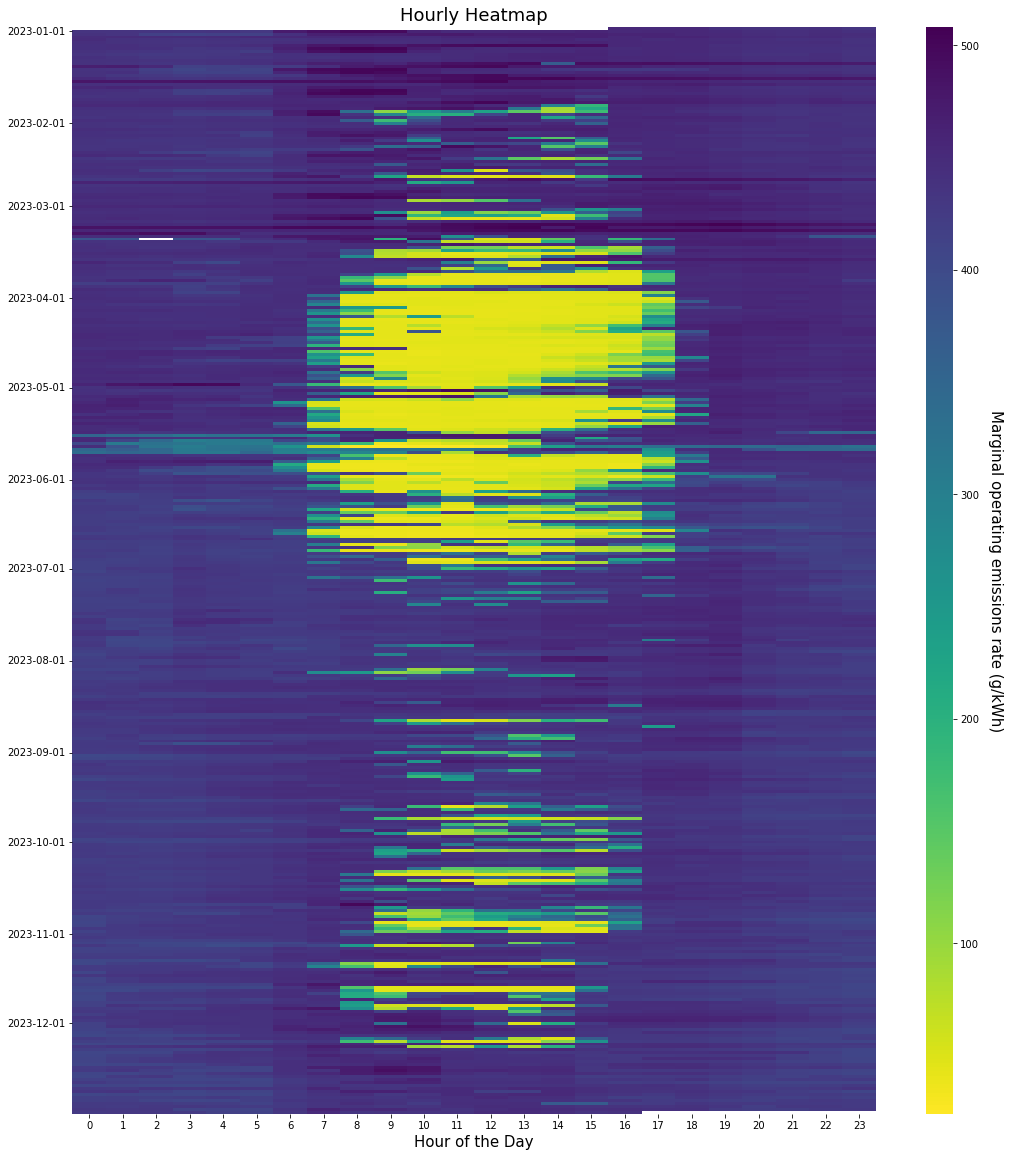

In [4]:
utils_plot.plot_hourly_heatmap(df_moer, ['moer'], "Marginal operating emissions rate (g/kWh)", figsize=(18, 20))

Read power data

In [5]:
data_df = pd.read_csv("./sw/sw.csv")
data_df['datetime'] = pd.to_datetime(data_df['datetime'])
data_df['datetime'] = data_df['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
df_power = utils_get.get_power(df=data_df, unit="W")
df_power.head()

/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,datetime,SDH.SW.MSA.CD4RA.PWR REAL 3 P,SDH.SW.MSA.ATS-ES.PWR REAL 3 P,SDH.SW.MSA.MSB.TIE.PWR REAL 3P,SDH.SW.MSA.MS41A.PWR REAL 3 P,SDH.SW.MSA.MDC.PWR REAL 3 P,SDH.SW.MSA.ATS-E2.PWR REAL 3 P,SDH.SW.MSB.MS41B.PWR REAL 3 P,SDH.SW.MSA.MAIN.PWR REAL 3 P,SDH.SW.MSA.MSB.PWR REAL 3 P,SDH.SW.MSB.ATS-EL.PWR REAL 3 P,SDH.SW.MSA.ATS-E1.PWR REAL 3 P,SDH.SW.MSB.CB4A.PWR REAL 3 P,SDH.SW.MSA.CH-2.PWR REAL 3 P,SDH.SW.MSA.MS41B.PWR REAL 3 P,SDH.SW.MSA.CD41A.PWR REAL 3 P,SDH.SW.MSB.MS41A.PWR REAL 3 P,SDH.SW.MSB.MAIN.PWR REAL 3 P
0,2023-01-20 15:45:00-08:00,24.999,16.999,0.0,331.999,22.999,30.999,179.999,537.999,0.0,93.999,59.999,55.999,71.999,0.0,29.999,0.0,379.999
1,2023-01-20 16:00:00-08:00,26.999,17.999,0.0,330.999,23.999,30.999,177.999,539.999,0.0,95.999,58.999,55.999,73.999,0.0,32.999,0.0,367.999
2,2023-01-20 16:15:00-08:00,24.999,17.499,0.0,334.499,24.499,27.999,175.499,546.999,0.0,102.999,69.999,57.999,70.999,0.0,25.999,0.0,363.499
3,2023-01-20 16:30:00-08:00,23.999,16.999,0.0,319.999,23.999,24.999,186.999,535.999,0.0,94.999,59.999,55.999,73.999,0.0,27.999,0.0,368.999
4,2023-01-20 16:45:00-08:00,23.999,17.999,0.0,325.999,23.499,30.999,160.999,542.499,0.0,99.999,60.999,54.999,68.999,0.0,29.999,0.0,366.499


Read climate data

In [6]:
df_climate = pd.read_csv("./climate/climate.csv")
df_climate['datetime'] = pd.to_datetime(df_climate['datetime'])
df_climate['datetime'] = df_climate['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
df_climate.head()

,datetime,air_temp,dni,ghi,t_out,rh_out,dew_point,wind_s,lat,long,time_zone
0,2023-01-01 00:00:00-08:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
1,2023-01-01 00:15:00-08:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
2,2023-01-01 00:30:00-08:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
3,2023-01-01 00:45:00-08:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
4,2023-01-01 01:00:00-08:00,10.0,0.0,0.0,9.4,86.289932,7.2,1.5,37.978,-122.0311,America/Los_Angeles


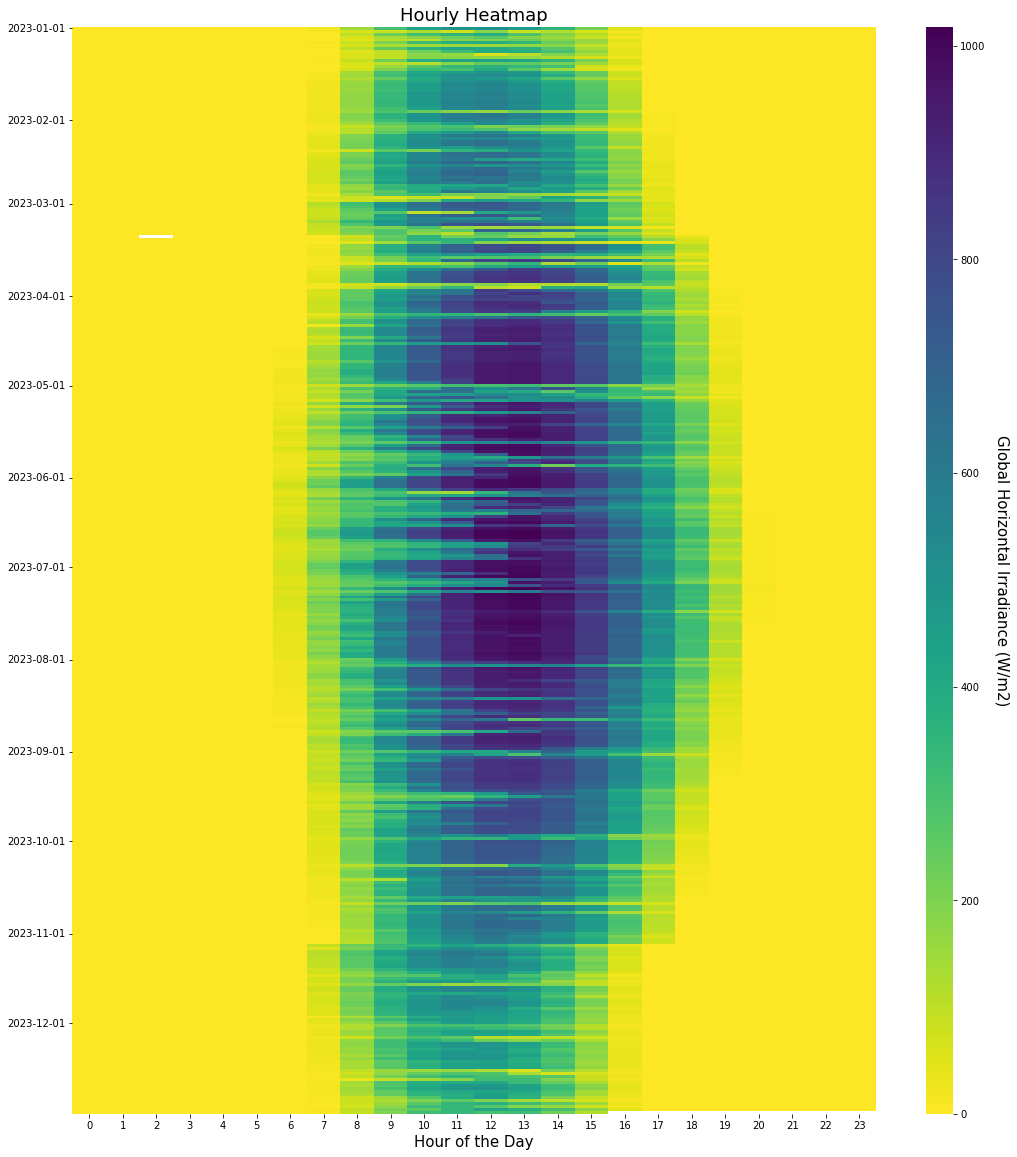

In [7]:
utils_plot.plot_hourly_heatmap(df_climate, ['ghi'], "Global Horizontal Irradiance (W/m2)", figsize=(18, 20))

Grid demand and supply information from California ISO

In [8]:
grid_demand = utils_get.get_grid_demand('./grid/demand/*.csv')
grid_solar = utils_get.get_grid_renew('./grid/renewables/*.csv', 'Solar')
grid_wind = utils_get.get_grid_renew('./grid/renewables/*.csv', 'Wind')
grid_renew = pd.merge(grid_solar, grid_wind, on='datetime', how='outer')
grid_renew['renew'] = grid_renew['Solar'] + grid_renew['Wind']
df_grid = pd.merge(grid_renew, grid_demand, on='datetime', how='outer')
df_grid.set_index('datetime', inplace=True)
df_grid = df_grid.resample('15T').ffill()
df_grid.reset_index(inplace=True)
df_grid.head()

,datetime,Solar,Wind,renew,demand
0,2023-01-01 00:00:00-08:00,NaN,NaN,NaN,21193.0
1,2023-01-01 00:15:00-08:00,NaN,NaN,NaN,21193.0
2,2023-01-01 00:30:00-08:00,NaN,NaN,NaN,21193.0
3,2023-01-01 00:45:00-08:00,NaN,NaN,NaN,21193.0
4,2023-01-01 01:00:00-08:00,NaN,NaN,NaN,20695.0


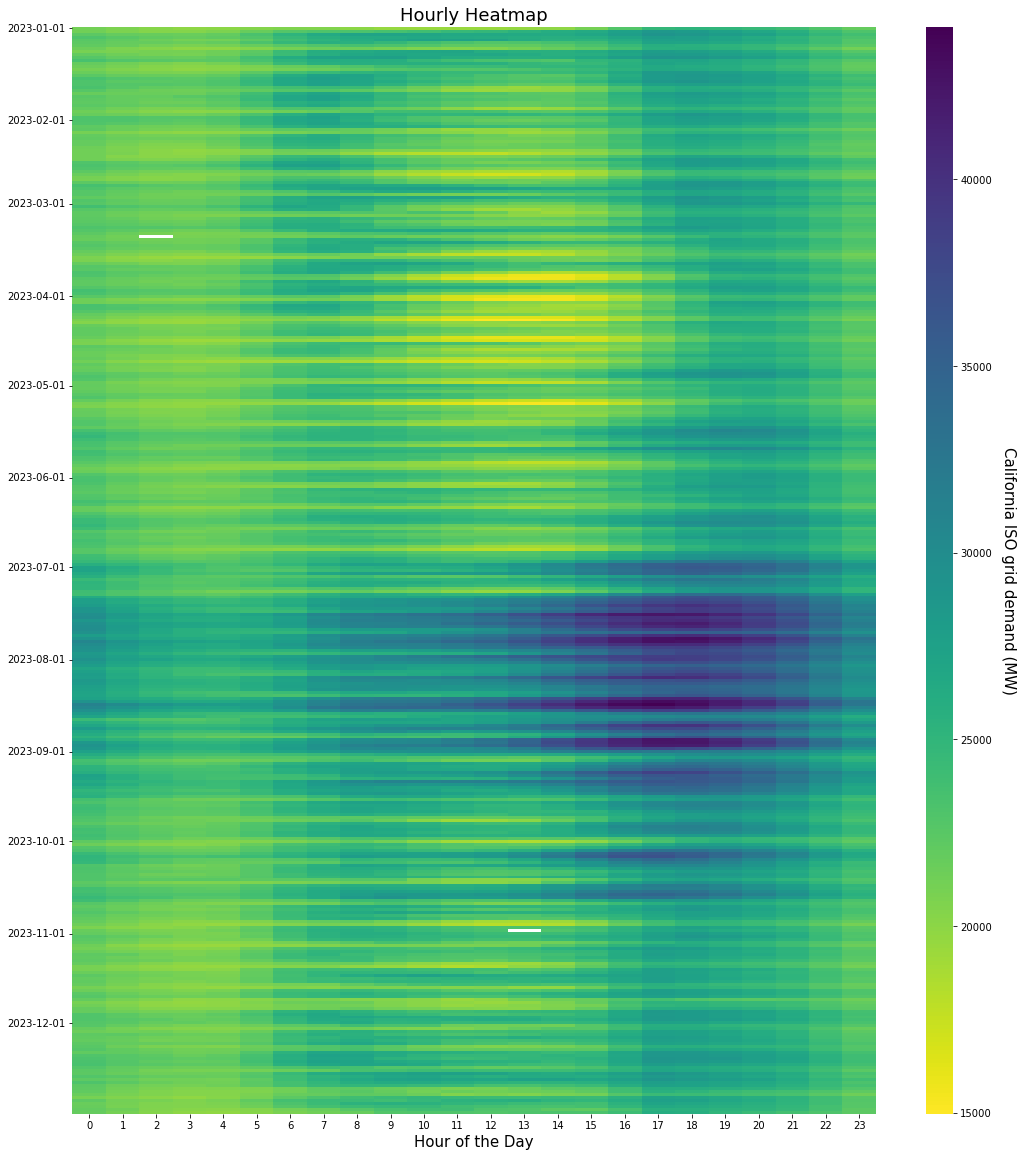

In [9]:
utils_plot.plot_hourly_heatmap(df_grid, ['demand'], 'California ISO grid demand (MW)', figsize=(18, 20))

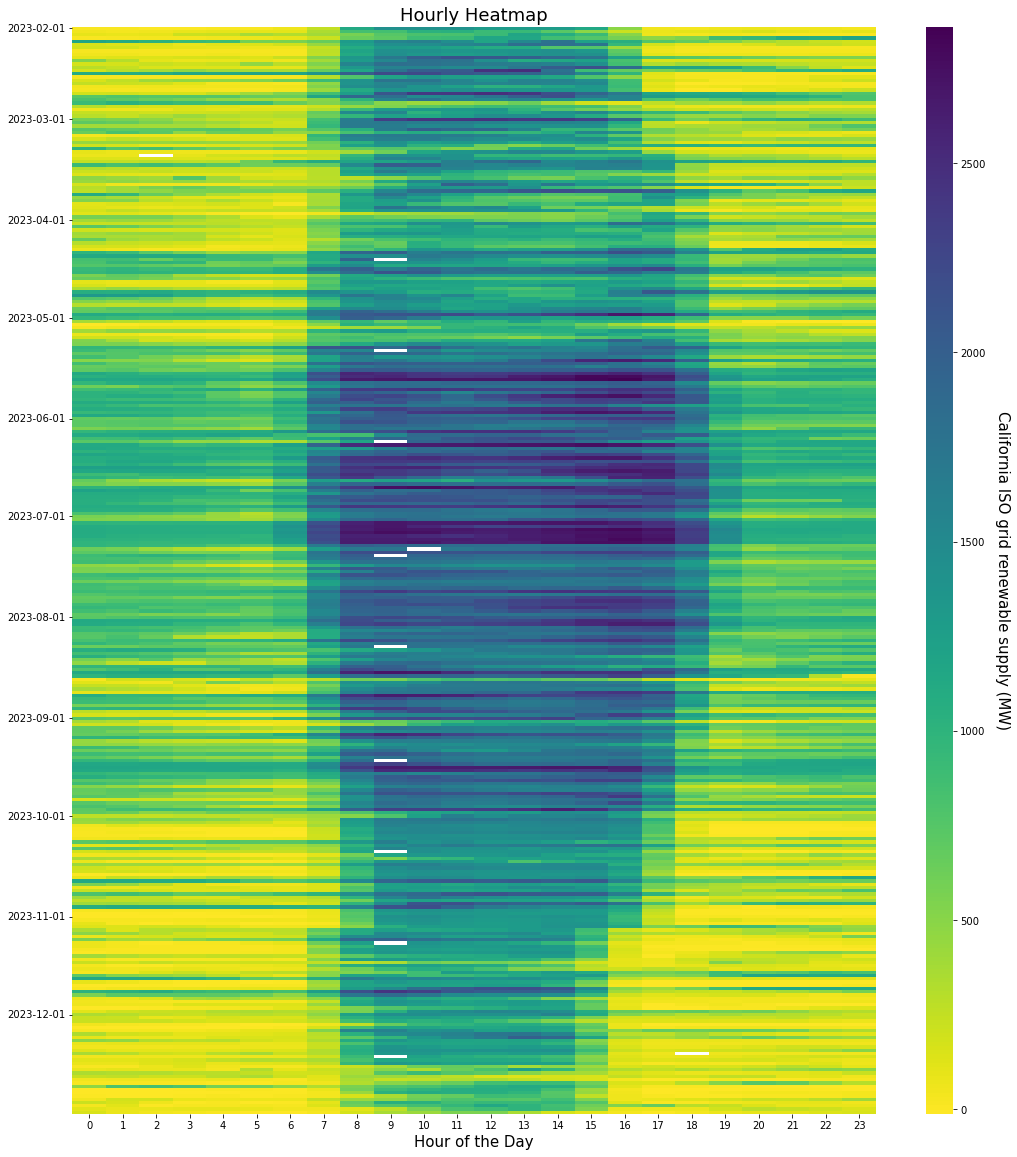

In [10]:
utils_plot.plot_hourly_heatmap(df_grid, ['renew'], 'California ISO grid renewable supply (MW)', figsize=(18, 20))

## Task 1: Examing HVAC related carbon emissions at Main station level

In [11]:
hvac_all = df_power['SDH.SW.MSA.MAIN.PWR REAL 3 P'] - df_power['SDH.SW.MSA.MS41A.PWR REAL 3 P'] + df_power['SDH.SW.MSB.MS41B.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac_all})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,385.999
1,2023-01-20 16:00:00-08:00,386.999
2,2023-01-20 16:15:00-08:00,387.999
3,2023-01-20 16:30:00-08:00,402.999
4,2023-01-20 16:45:00-08:00,377.499


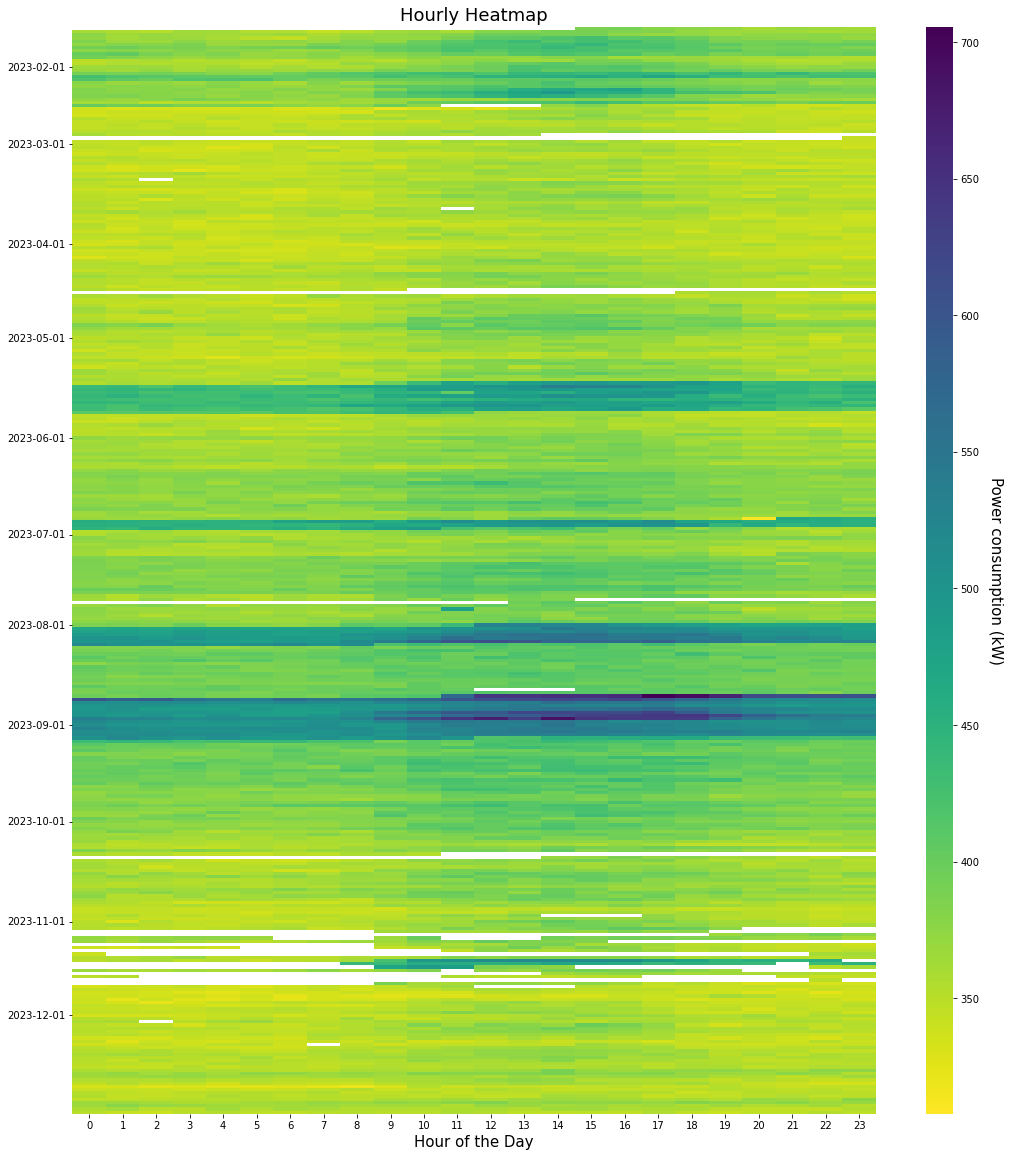

In [12]:
utils_plot.plot_hourly_heatmap(df_HVAC, columns, 'Power consumption (kW)', figsize=(18, 20))

Get emissions data

In [13]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,182.954262
1,2023-01-20 16:00:00-08:00,177.044561
2,2023-01-20 16:15:00-08:00,176.210263
3,2023-01-20 16:30:00-08:00,182.595623
4,2023-01-20 16:45:00-08:00,171.098905


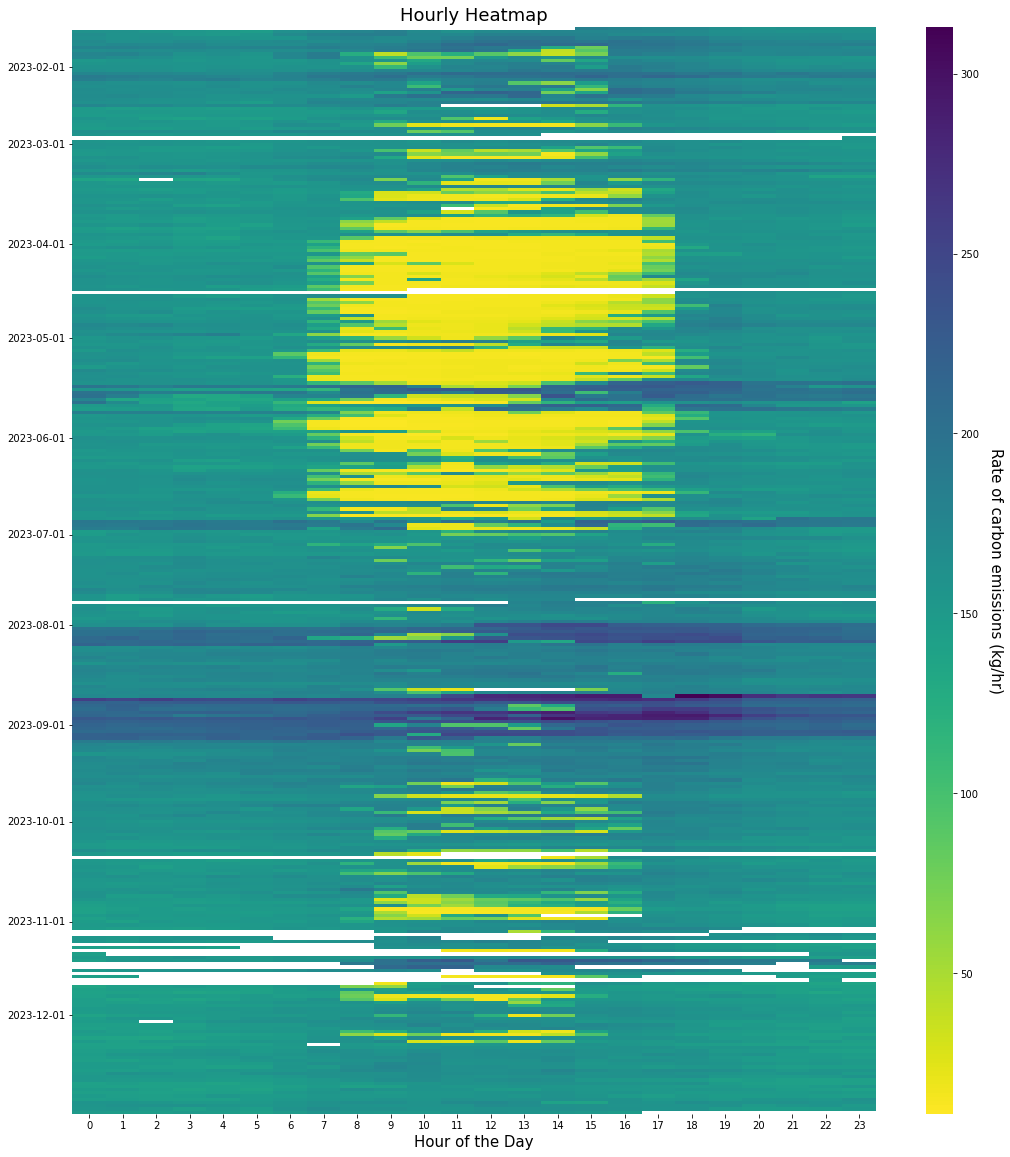

In [14]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Rate of carbon emissions (kg/hr)', figsize=(18, 20))

Get overall dataframe

In [15]:
df_all = pd.merge(df_emissions[['datetime', 'HVAC']], pd.merge(df_climate, df_grid, on='datetime', how='inner'), on = 'datetime', how = 'outer')
df_all.head()

,datetime,HVAC,air_temp,dni,ghi,t_out,rh_out,dew_point,wind_s,lat,long,time_zone,Solar,Wind,renew,demand
0,2023-01-20 15:45:00-08:00,182.954262,13.0,680.0,207.0,12.2,38.307616,-1.7,3.6,37.978,-122.0311,America/Los_Angeles,NaN,NaN,NaN,23332.0
1,2023-01-20 16:00:00-08:00,177.044561,13.0,622.0,164.0,11.1,43.043584,-1.1,2.1,37.978,-122.0311,America/Los_Angeles,NaN,NaN,NaN,25339.0
2,2023-01-20 16:15:00-08:00,176.210263,12.0,545.0,121.0,11.1,43.043584,-1.1,2.1,37.978,-122.0311,America/Los_Angeles,NaN,NaN,NaN,25339.0
3,2023-01-20 16:30:00-08:00,182.595623,12.0,445.0,79.0,11.1,43.043584,-1.1,2.1,37.978,-122.0311,America/Los_Angeles,NaN,NaN,NaN,25339.0
4,2023-01-20 16:45:00-08:00,171.098905,12.0,225.0,40.0,11.1,43.043584,-1.1,2.1,37.978,-122.0311,America/Los_Angeles,NaN,NaN,NaN,25339.0


Hourly average and occupied hours 

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


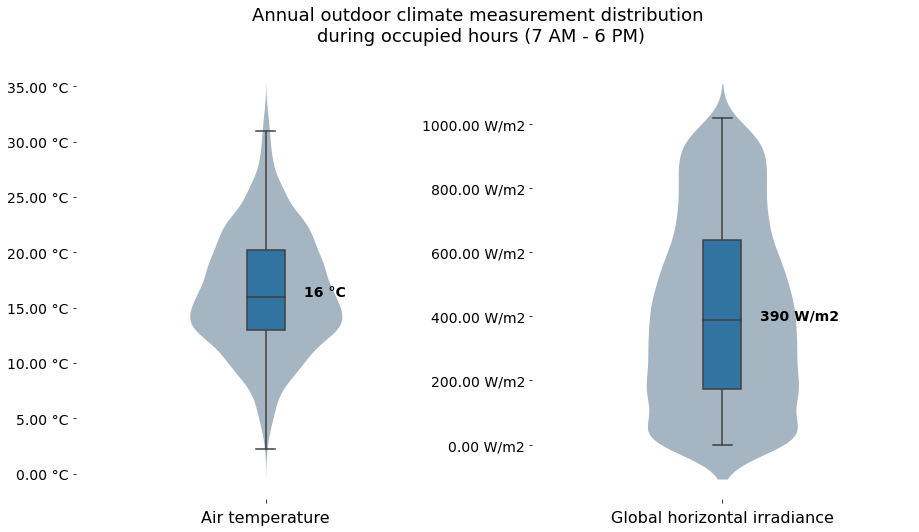

In [16]:
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)

df_hourly_occ = df_hourly[(df_hourly['datetime'].dt.hour >= 7) & (df_hourly['datetime'].dt.hour <= 18)]
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
utils_plot.create_violin_plot(df_hourly_occ, ['air_temp'], ' °C', axe=axs[0], hide_xticks=True, xlabel='Air temperature')
utils_plot.create_violin_plot(df_hourly_occ, ['ghi'], ' W/m2', axe=axs[1], hide_xticks=True, xlabel='Global horizontal irradiance')
fig.suptitle('Annual outdoor climate measurement distribution \nduring occupied hours (7 AM - 6 PM)', fontsize=18)
plt.show()

Time window: Mar - Jun

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


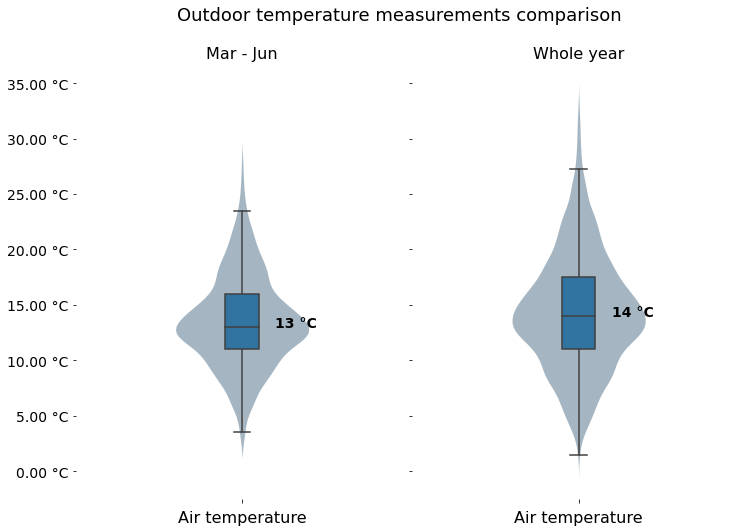

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


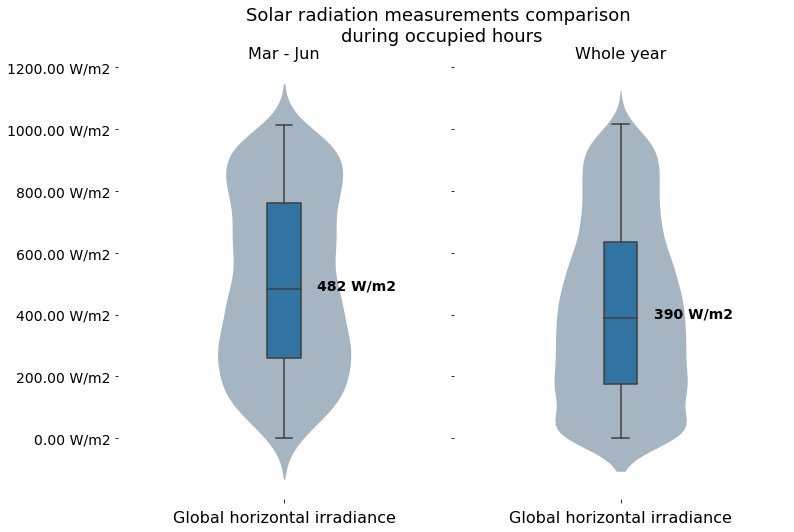

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


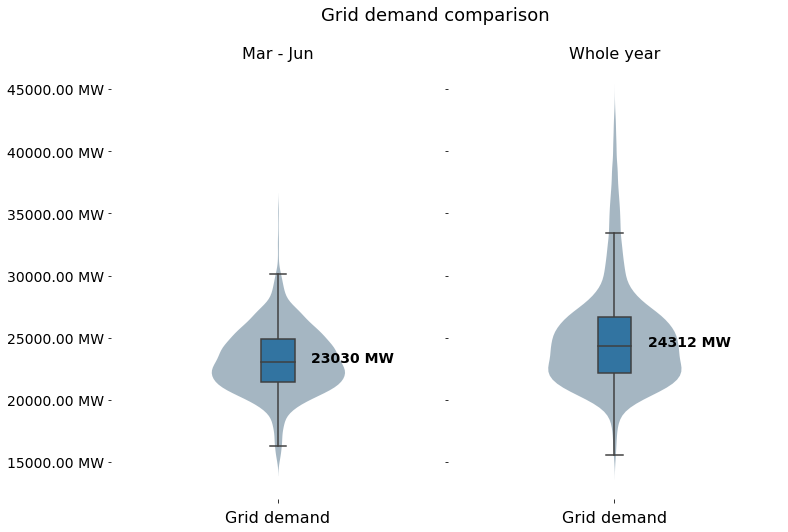

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


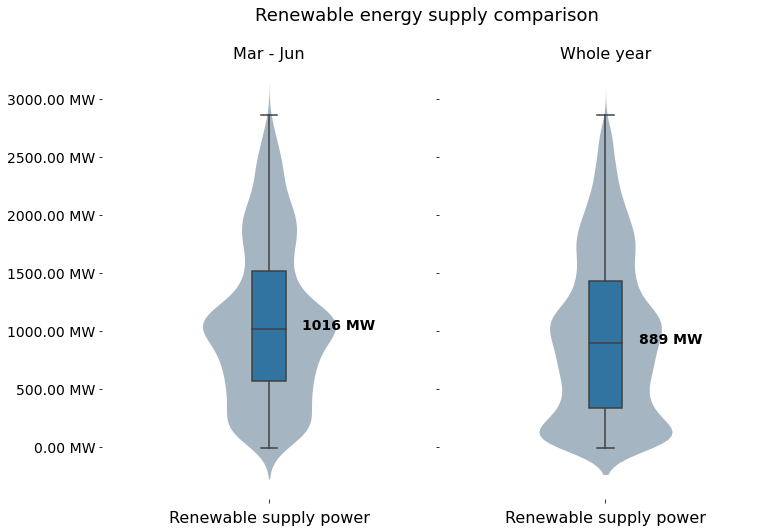

In [17]:
df_MJ = df_hourly[(df_hourly['datetime'].dt.month >= 3) & (df_hourly['datetime'].dt.month <= 6)]
df_MJ = df_MJ[columns + ['air_temp', 'ghi', 'rh_out', 'demand', 'renew']]
df_MJ_occ = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 3) & (df_hourly_occ['datetime'].dt.month <= 6)]

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
utils_plot.create_violin_plot(df_MJ, ['air_temp'], ' °C', axs[0], plot_title='Mar - Jun', hide_xticks=True, xlabel='Air temperature')
utils_plot.create_violin_plot(df_hourly, ['air_temp'], ' °C', axs[1], plot_title='Whole year', hide_xticks=True, xlabel='Air temperature')
fig.suptitle('Outdoor temperature measurements comparison', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
utils_plot.create_violin_plot(df_MJ_occ, ['ghi'], ' W/m2', axs[0], plot_title='Mar - Jun', hide_xticks=True, xlabel='Global horizontal irradiance')
utils_plot.create_violin_plot(df_hourly_occ, ['ghi'], ' W/m2', axs[1], plot_title='Whole year', hide_xticks=True, xlabel='Global horizontal irradiance')
fig.suptitle('Solar radiation measurements comparison \nduring occupied hours', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
utils_plot.create_violin_plot(df_MJ, ['demand'], ' MW', axs[0], plot_title='Mar - Jun', hide_xticks=True, xlabel='Grid demand')
utils_plot.create_violin_plot(df_hourly, ['demand'], ' MW', axs[1], plot_title='Whole year', hide_xticks=True, xlabel='Grid demand')
fig.suptitle('Grid demand comparison', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
utils_plot.create_violin_plot(df_MJ, ['renew'], ' MW', axs[0], plot_title='Mar - Jun', hide_xticks=True, xlabel='Renewable supply power')
utils_plot.create_violin_plot(df_hourly, ['renew'], ' MW', axs[1], plot_title='Whole year', hide_xticks=True, xlabel='Renewable supply power')
fig.suptitle('Renewable energy supply comparison', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

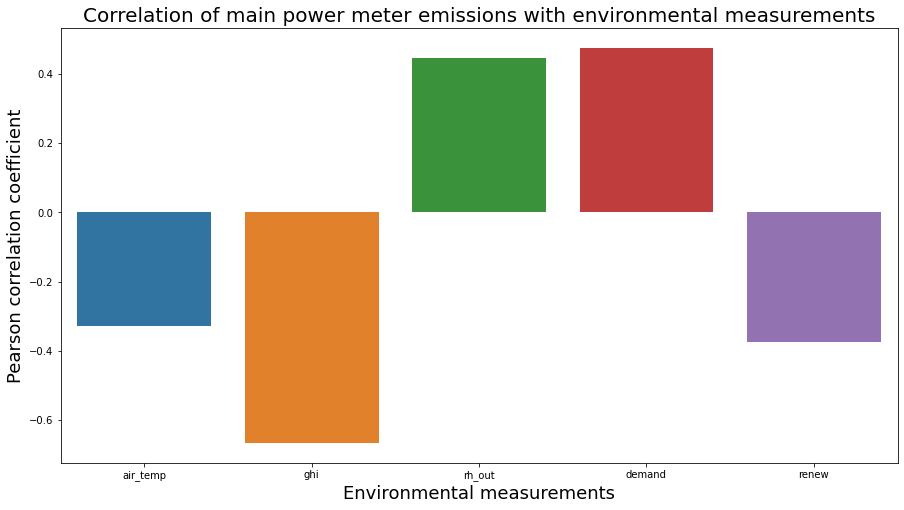

In [18]:
correlation_matrix = df_MJ.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Time window: Jul - Sep

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


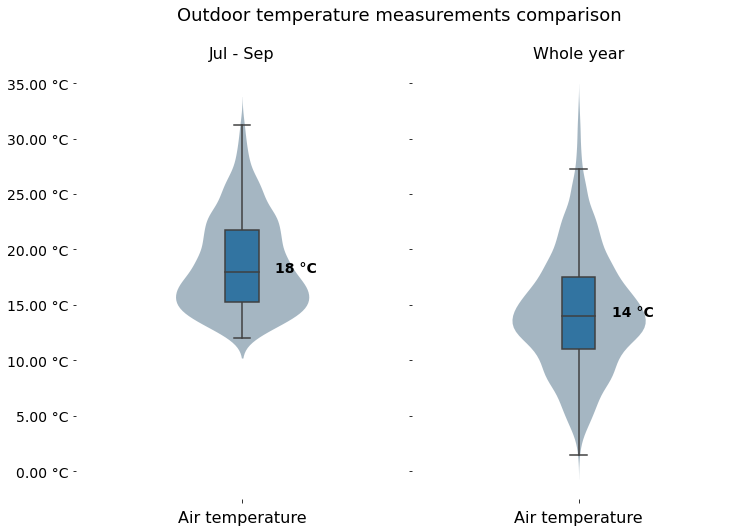

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


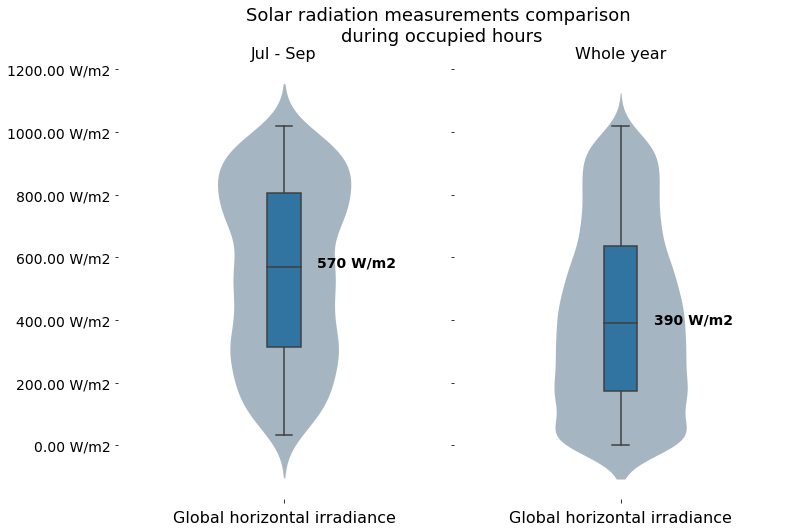

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


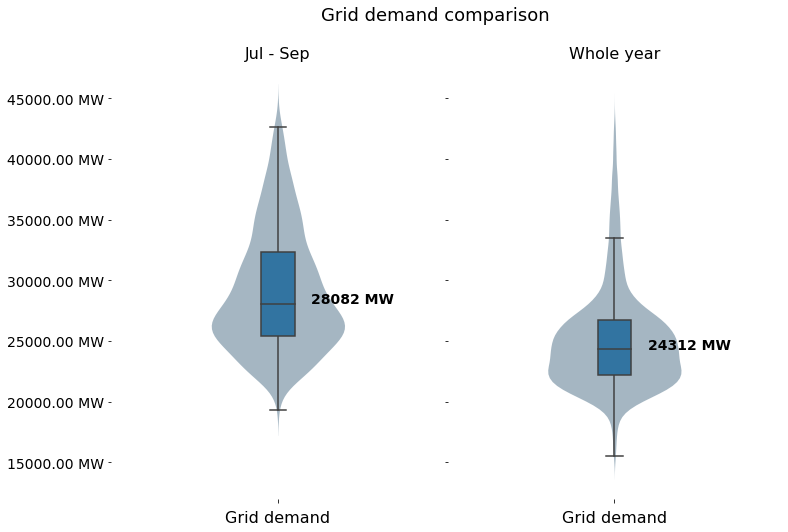

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


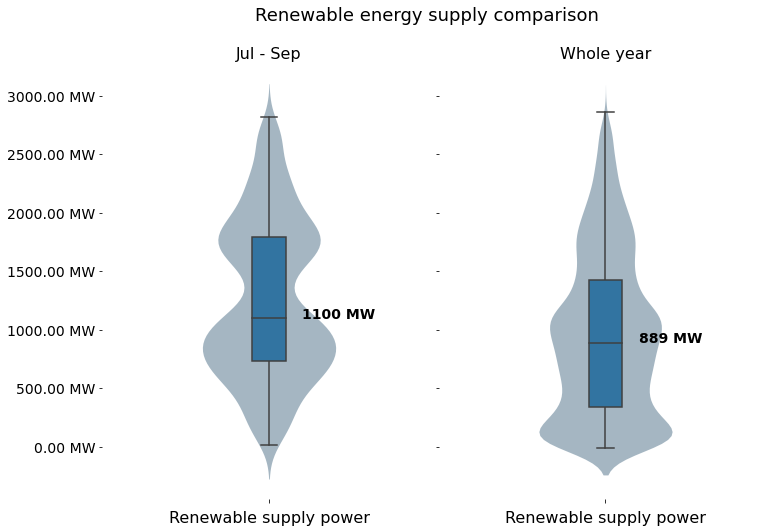

In [19]:
df_JS = df_hourly[(df_hourly['datetime'].dt.month >= 7) & (df_hourly['datetime'].dt.month <= 9)]
df_JS = df_JS[columns + ['air_temp', 'ghi', 'rh_out', 'demand', 'renew']]
df_JS_occ = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 7) & (df_hourly_occ['datetime'].dt.month <= 9)]

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
utils_plot.create_violin_plot(df_JS, ['air_temp'], ' °C', axs[0], plot_title='Jul - Sep', hide_xticks=True, xlabel='Air temperature')
utils_plot.create_violin_plot(df_hourly, ['air_temp'], ' °C', axs[1], plot_title='Whole year', hide_xticks=True, xlabel='Air temperature')
fig.suptitle('Outdoor temperature measurements comparison', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
utils_plot.create_violin_plot(df_JS_occ, ['ghi'], ' W/m2', axs[0], plot_title='Jul - Sep', hide_xticks=True, xlabel='Global horizontal irradiance')
utils_plot.create_violin_plot(df_hourly_occ, ['ghi'], ' W/m2', axs[1], plot_title='Whole year', hide_xticks=True, xlabel='Global horizontal irradiance')
fig.suptitle('Solar radiation measurements comparison \nduring occupied hours', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
utils_plot.create_violin_plot(df_JS, ['demand'], ' MW', axs[0], plot_title='Jul - Sep', hide_xticks=True, xlabel='Grid demand')
utils_plot.create_violin_plot(df_hourly, ['demand'], ' MW', axs[1], plot_title='Whole year', hide_xticks=True, xlabel='Grid demand')
fig.suptitle('Grid demand comparison', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
utils_plot.create_violin_plot(df_JS, ['renew'], ' MW', axs[0], plot_title='Jul - Sep', hide_xticks=True, xlabel='Renewable supply power')
utils_plot.create_violin_plot(df_hourly, ['renew'], ' MW', axs[1], plot_title='Whole year', hide_xticks=True, xlabel='Renewable supply power')
fig.suptitle('Renewable energy supply comparison', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

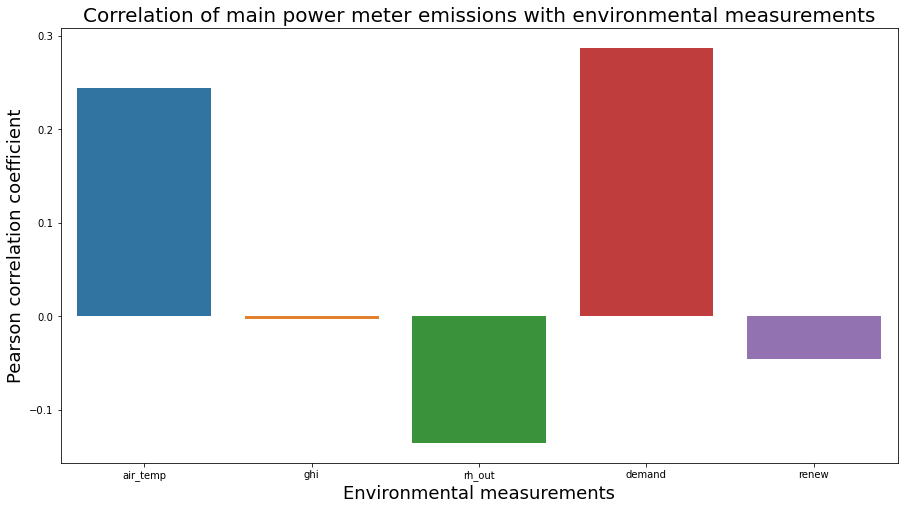

In [20]:
correlation_matrix = df_JS.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Time window: Oct - Feb

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


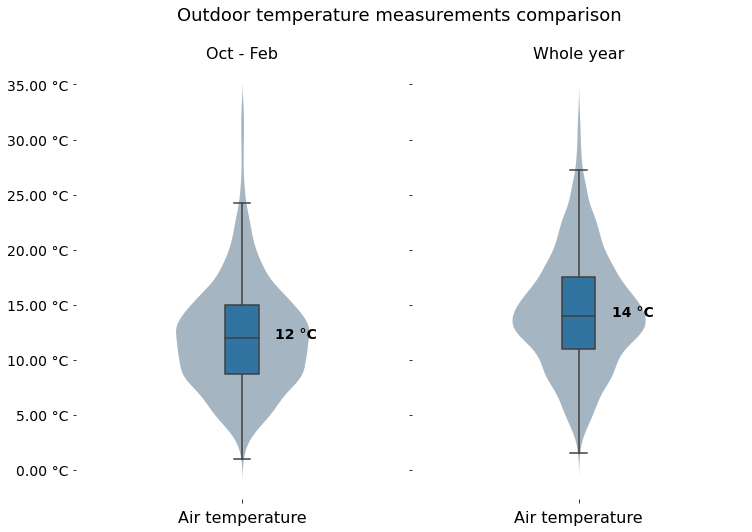

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


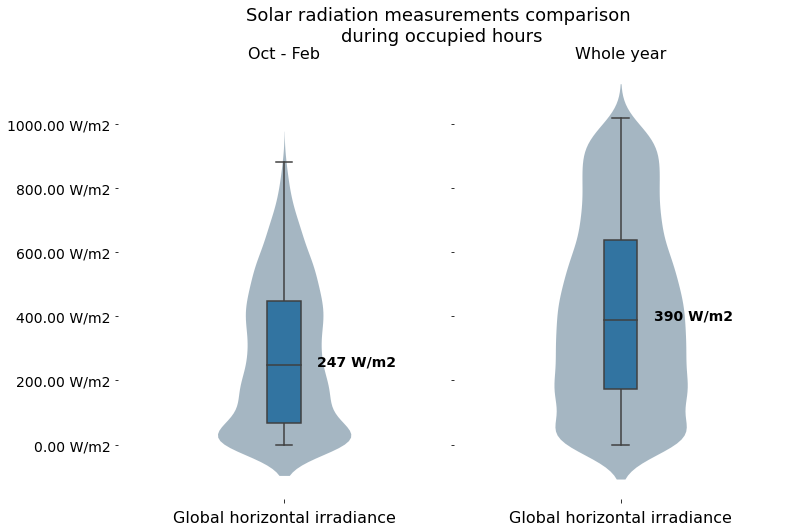

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


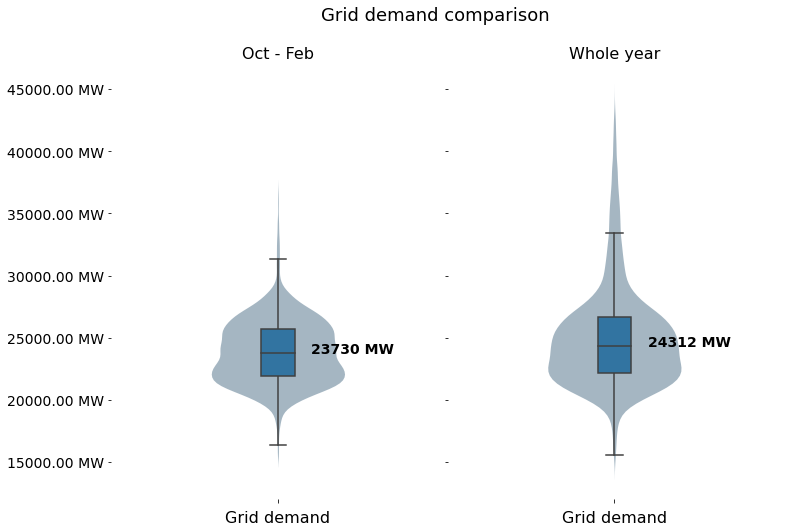

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


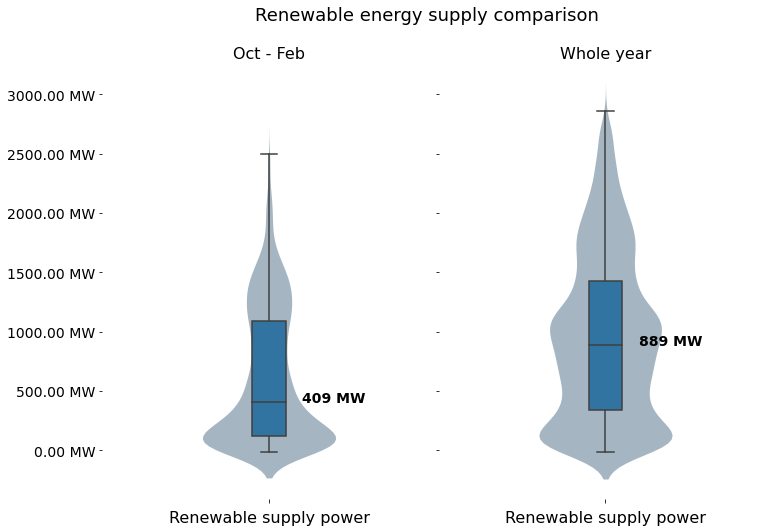

In [21]:
df_OF = df_hourly[(df_hourly['datetime'].dt.month >= 10) | (df_hourly['datetime'].dt.month <= 3)]
df_OF = df_OF[columns + ['air_temp', 'ghi', 'rh_out', 'demand', 'renew']]
df_OF_occ = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 10) | (df_hourly_occ['datetime'].dt.month <= 3)]

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
utils_plot.create_violin_plot(df_OF, ['air_temp'], ' °C', axs[0], plot_title='Oct - Feb', hide_xticks=True, xlabel='Air temperature')
utils_plot.create_violin_plot(df_hourly, ['air_temp'], ' °C', axs[1], plot_title='Whole year', hide_xticks=True, xlabel='Air temperature')
fig.suptitle('Outdoor temperature measurements comparison', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
utils_plot.create_violin_plot(df_OF_occ, ['ghi'], ' W/m2', axs[0], plot_title='Oct - Feb', hide_xticks=True, xlabel='Global horizontal irradiance')
utils_plot.create_violin_plot(df_hourly_occ, ['ghi'], ' W/m2', axs[1], plot_title='Whole year', hide_xticks=True, xlabel='Global horizontal irradiance')
fig.suptitle('Solar radiation measurements comparison \nduring occupied hours', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
utils_plot.create_violin_plot(df_OF, ['demand'], ' MW', axs[0], plot_title='Oct - Feb', hide_xticks=True, xlabel='Grid demand')
utils_plot.create_violin_plot(df_hourly, ['demand'], ' MW', axs[1], plot_title='Whole year', hide_xticks=True, xlabel='Grid demand')
fig.suptitle('Grid demand comparison', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
utils_plot.create_violin_plot(df_OF, ['renew'], ' MW', axs[0], plot_title='Oct - Feb', hide_xticks=True, xlabel='Renewable supply power')
utils_plot.create_violin_plot(df_hourly, ['renew'], ' MW', axs[1], plot_title='Whole year', hide_xticks=True, xlabel='Renewable supply power')
fig.suptitle('Renewable energy supply comparison', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

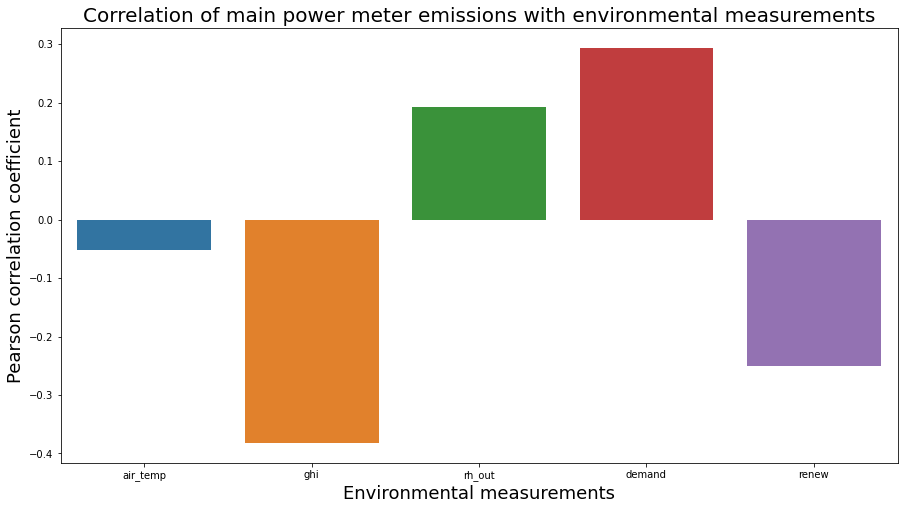

In [22]:
correlation_matrix = df_OF.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Load shift potential and hourly carbon emissions breakdown by time windows

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


Text(0.5, 0.98, 'Rate of carbon emissions distribution by hour of the day')

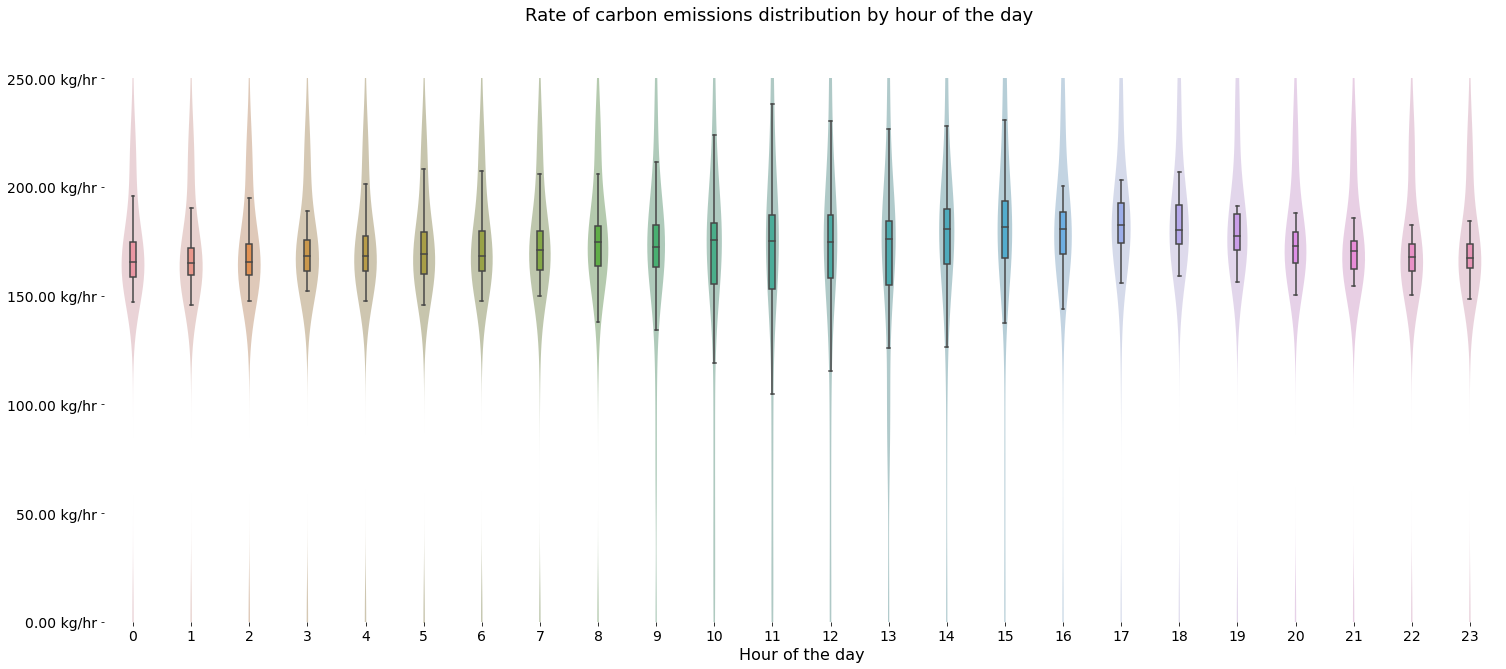

In [23]:
# Time window: August ~ September

df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 7) & (df_hourly['datetime'].dt.month <= 9)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
# Ensure Datetime is the index
df_hourly_emissions['Hour'] = df_hourly_emissions['datetime'].dt.hour

# Pivot table to rearrange the DataFrame
df_pivot = df_hourly_emissions.pivot_table(index=df_hourly_emissions['datetime'].dt.date, columns='Hour', values='HVAC', aggfunc='sum')
df_pivot.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(25, 10))
utils_plot.create_violin_plot(df_pivot, range(0, 24), ' kg/hr', axe=ax, annotation=False, hide_xticks=False, xlabel='Hour of the day', ylim=[0, 250])
fig.suptitle('Rate of carbon emissions distribution by hour of the day', fontsize=18)

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


Text(0.5, 0.98, 'Rate of carbon emissions distribution by hour of the day')

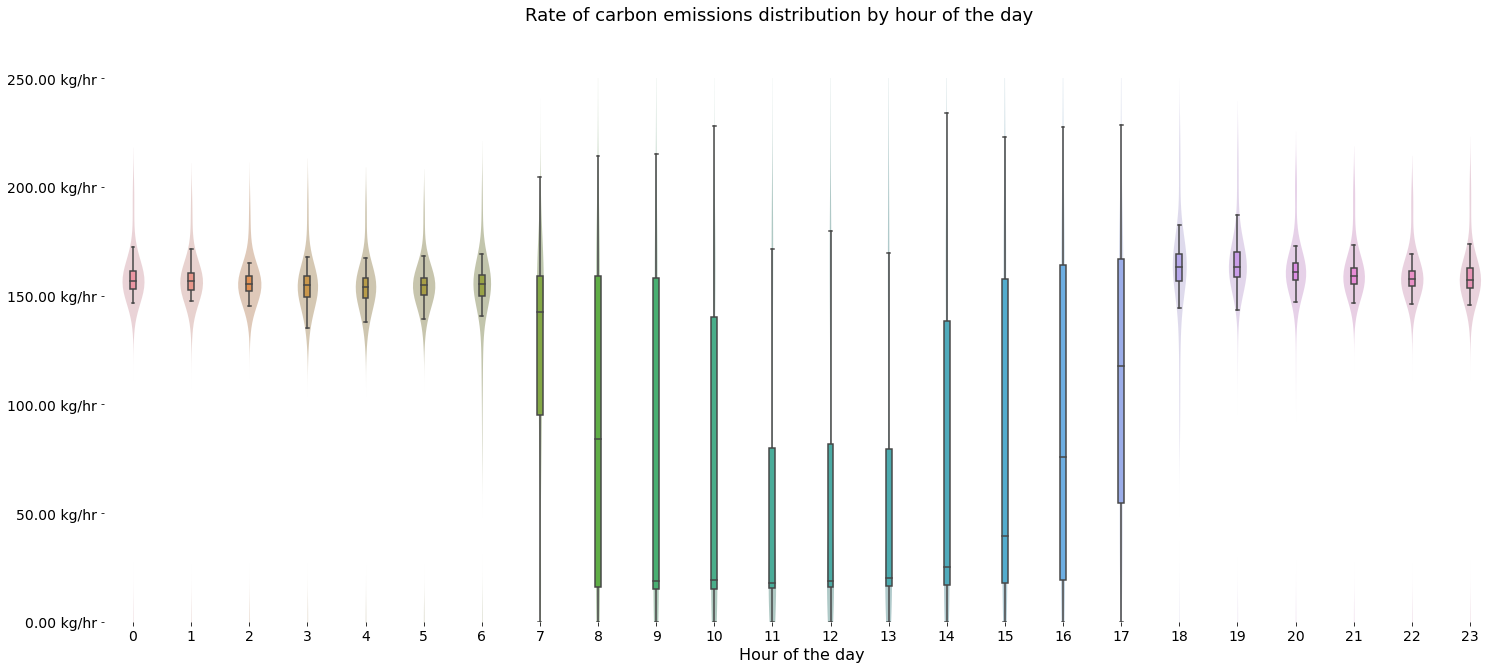

In [24]:
# Time window: March ~ July
df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 3) & (df_hourly['datetime'].dt.month <= 6)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
# Ensure Datetime is the index
df_hourly_emissions['Hour'] = df_hourly_emissions['datetime'].dt.hour

# Pivot table to rearrange the DataFrame
df_pivot = df_hourly_emissions.pivot_table(index=df_hourly_emissions['datetime'].dt.date, columns='Hour', values='HVAC', aggfunc='sum')
df_pivot.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(25, 10))
utils_plot.create_violin_plot(df_pivot, range(0, 24), ' kg/hr', axe=ax, annotation=False, hide_xticks=False, xlabel='Hour of the day', ylim=[0, 250])
fig.suptitle('Rate of carbon emissions distribution by hour of the day', fontsize=18)

## Task 2: Examing HVAC related carbon emissions for Nano fab

In [25]:
hvac_nano = df_power['SDH.SW.MSA.MS41A.PWR REAL 3 P'] + df_power['SDH.SW.MSA.MS41B.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac_nano})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,331.999
1,2023-01-20 16:00:00-08:00,330.999
2,2023-01-20 16:15:00-08:00,334.499
3,2023-01-20 16:30:00-08:00,319.999
4,2023-01-20 16:45:00-08:00,325.999


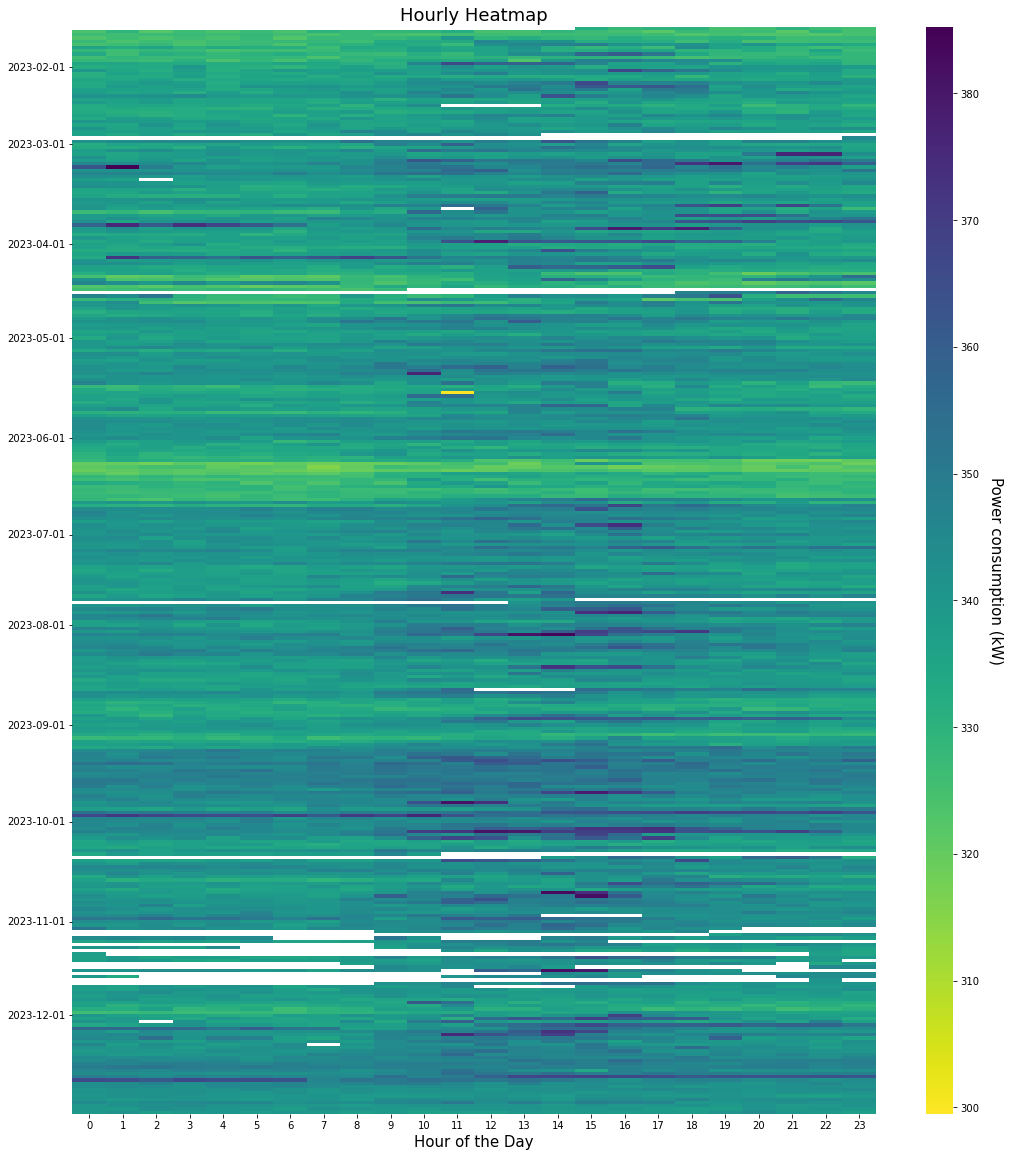

In [26]:
utils_plot.plot_hourly_heatmap(df_HVAC, columns, 'Power consumption (kW)', figsize=(18, 20))

In [27]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,157.359558
1,2023-01-20 16:00:00-08:00,151.425643
2,2023-01-20 16:15:00-08:00,151.913167
3,2023-01-20 16:30:00-08:00,144.988987
4,2023-01-20 16:45:00-08:00,147.756873


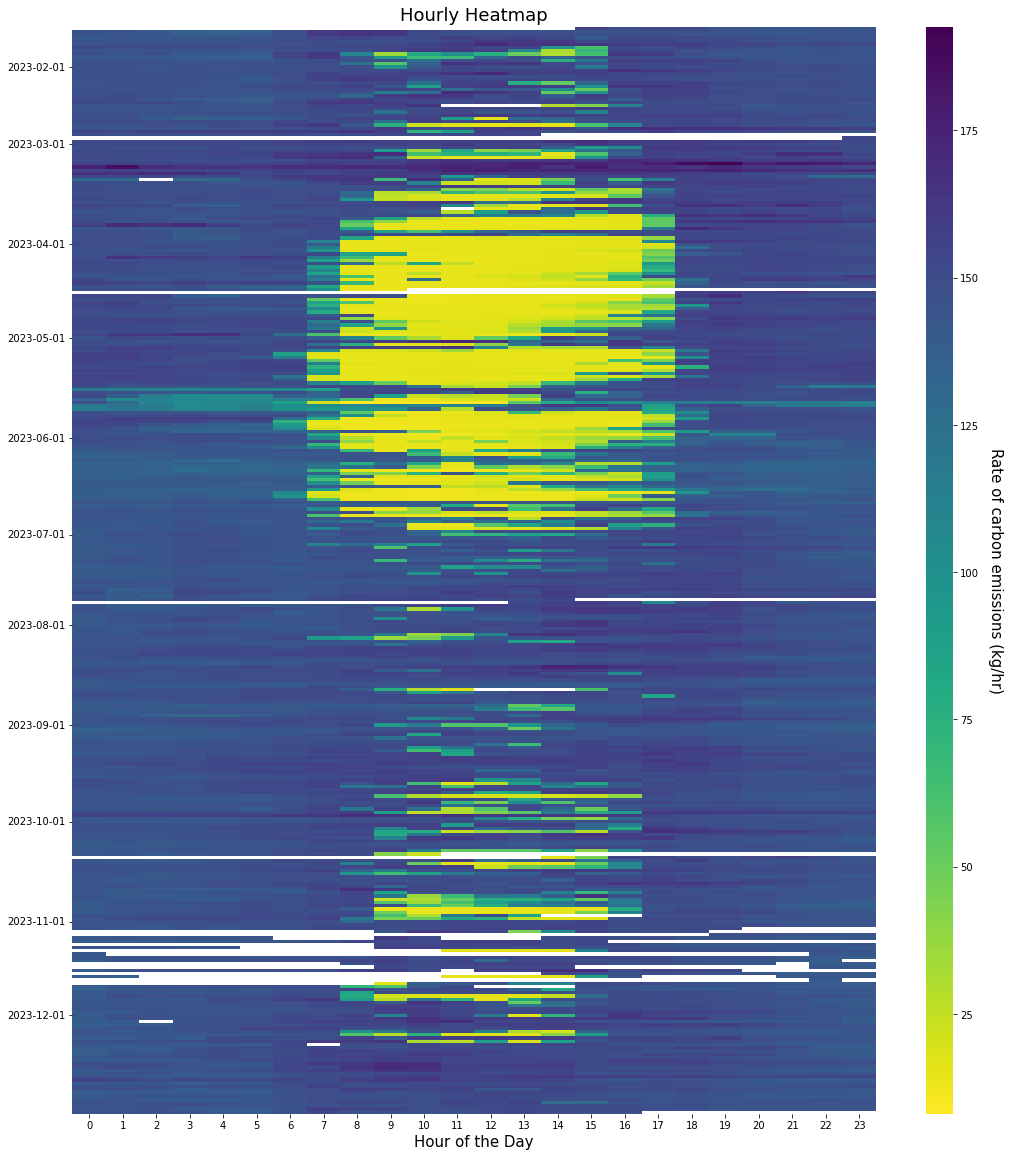

In [28]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Rate of carbon emissions (kg/hr)', figsize=(18, 20))

Get overall dataframe

In [29]:
df_all = pd.merge(df_emissions[['datetime', 'HVAC']], df_climate, on = 'datetime', how = 'outer')
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)


Load shift potential and hourly carbon emissions breakdown by time windows

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


Text(0.5, 0.98, 'Rate of carbon emissions distribution by hour of the day')

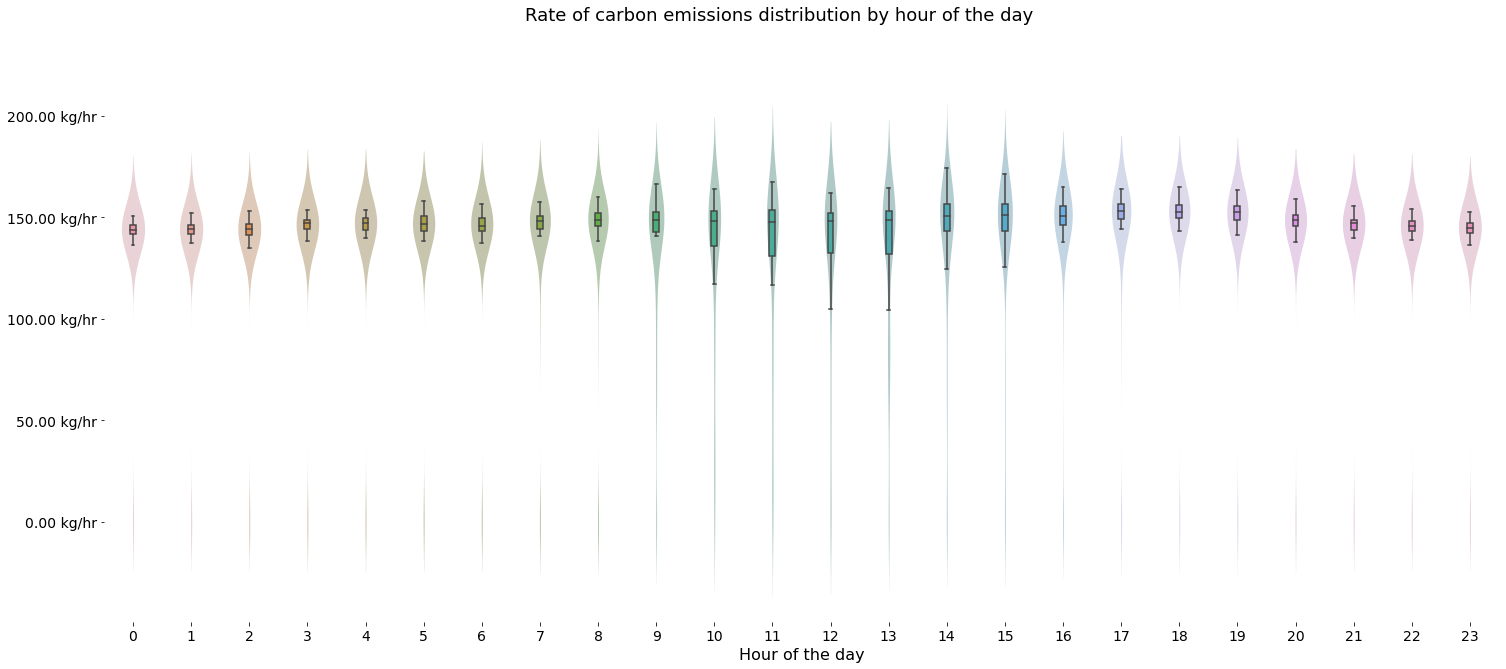

In [30]:
# Time window: August ~ September

df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 7) & (df_hourly['datetime'].dt.month <= 9)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
# Ensure Datetime is the index
df_hourly_emissions['Hour'] = df_hourly_emissions['datetime'].dt.hour

# Pivot table to rearrange the DataFrame
df_pivot = df_hourly_emissions.pivot_table(index=df_hourly_emissions['datetime'].dt.date, columns='Hour', values='HVAC', aggfunc='sum')
df_pivot.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(25, 10))
utils_plot.create_violin_plot(df_pivot, range(0, 24), ' kg/hr', axe=ax, annotation=False, hide_xticks=False, xlabel='Hour of the day')
fig.suptitle('Rate of carbon emissions distribution by hour of the day', fontsize=18)

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


Text(0.5, 0.98, 'Rate of carbon emissions distribution by hour of the day')

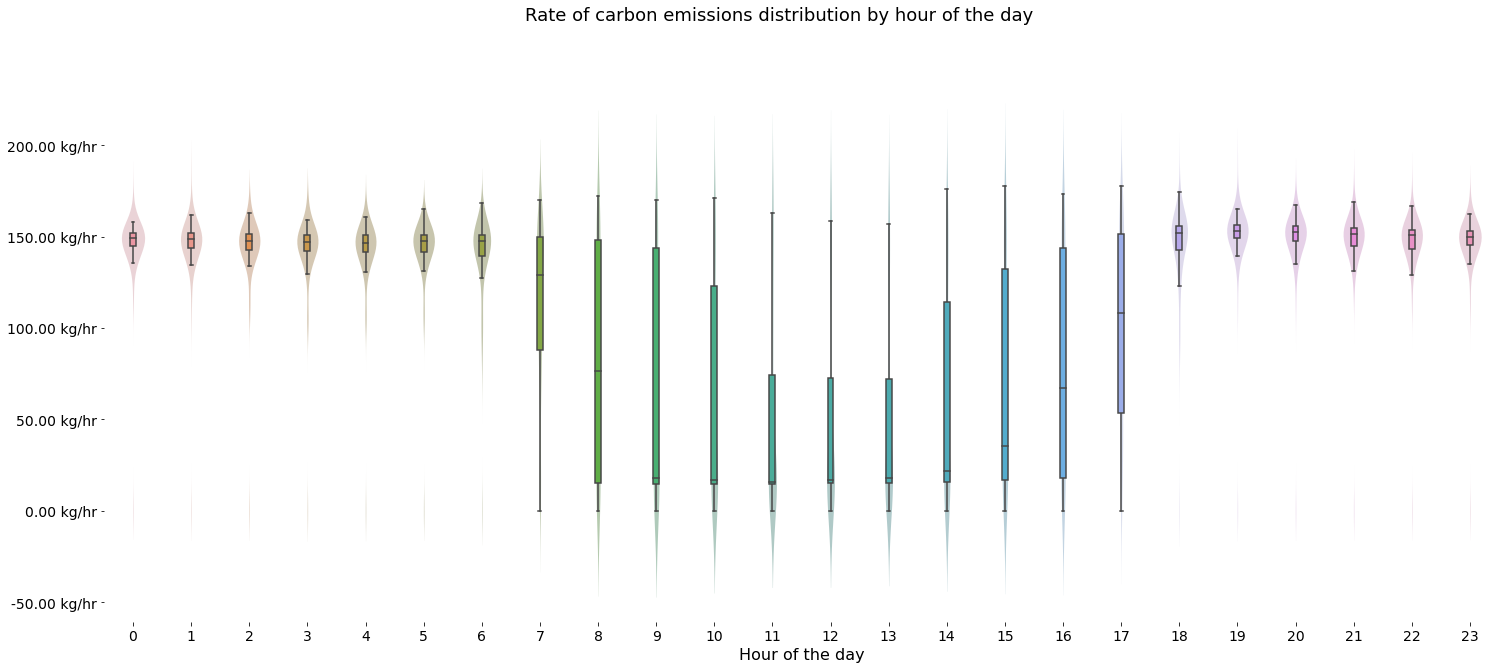

In [31]:
# Time window: March ~ July
df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 3) & (df_hourly['datetime'].dt.month <= 6)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
# Ensure Datetime is the index
df_hourly_emissions['Hour'] = df_hourly_emissions['datetime'].dt.hour

# Pivot table to rearrange the DataFrame
df_pivot = df_hourly_emissions.pivot_table(index=df_hourly_emissions['datetime'].dt.date, columns='Hour', values='HVAC', aggfunc='sum')
df_pivot.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(25, 10))
utils_plot.create_violin_plot(df_pivot, range(0, 24), ' kg/hr', axe=ax, annotation=False, hide_xticks=False, xlabel='Hour of the day')
fig.suptitle('Rate of carbon emissions distribution by hour of the day', fontsize=18)

## Task 3: Examing HVAC related carbon emissions for office space

In [32]:
hvac_office = df_power['SDH.SW.MSA.CD4RA.PWR REAL 3 P'] + df_power['SDH.SW.MSB.MS41B.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac_office})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,204.998
1,2023-01-20 16:00:00-08:00,204.998
2,2023-01-20 16:15:00-08:00,200.498
3,2023-01-20 16:30:00-08:00,210.998
4,2023-01-20 16:45:00-08:00,184.998


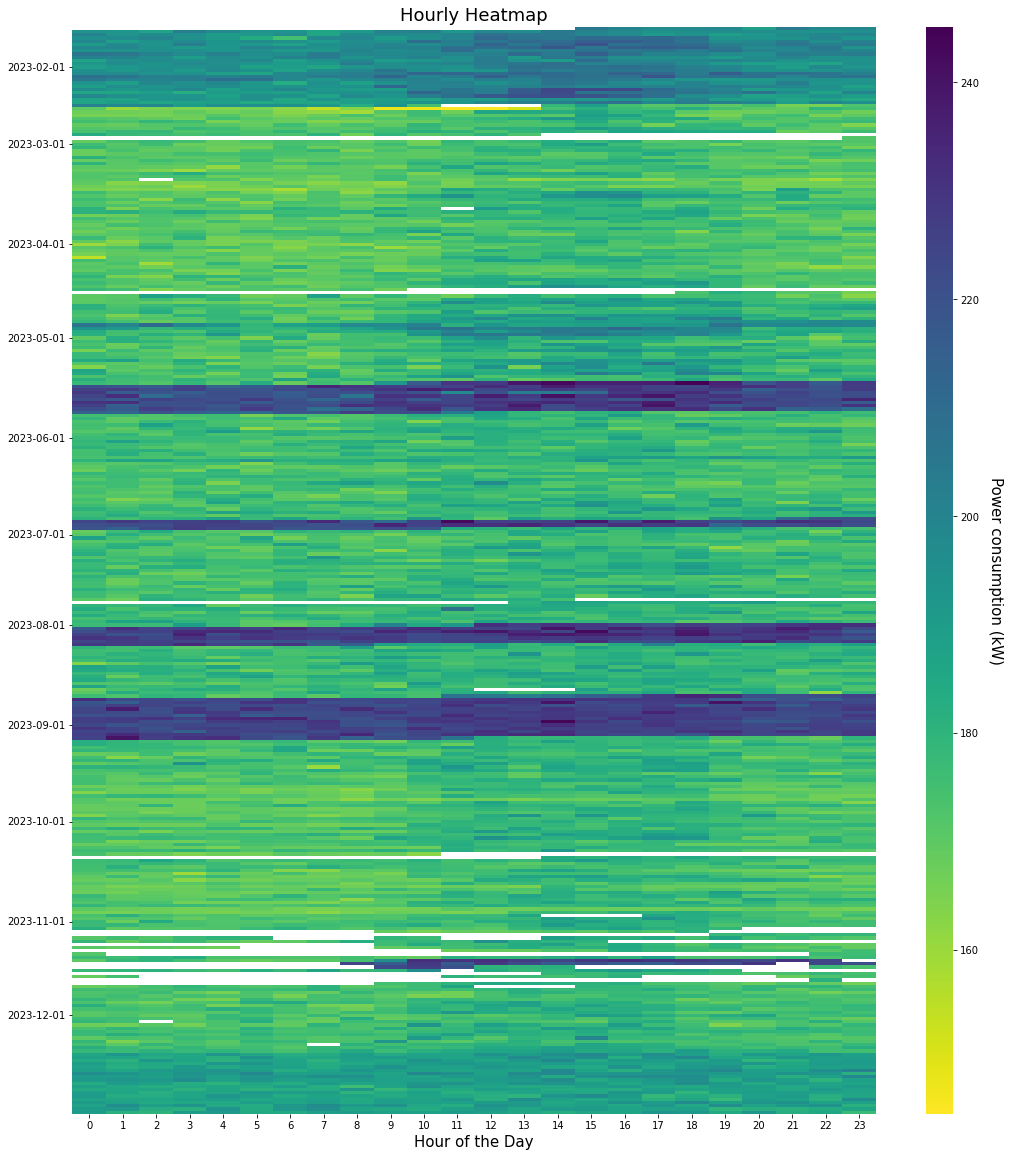

In [33]:
utils_plot.plot_hourly_heatmap(df_HVAC, columns, 'Power consumption (kW)', figsize=(18, 20))

In [34]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,97.164132
1,2023-01-20 16:00:00-08:00,93.782622
2,2023-01-20 16:15:00-08:00,91.056434
3,2023-01-20 16:30:00-08:00,95.601506
4,2023-01-20 16:45:00-08:00,83.849110


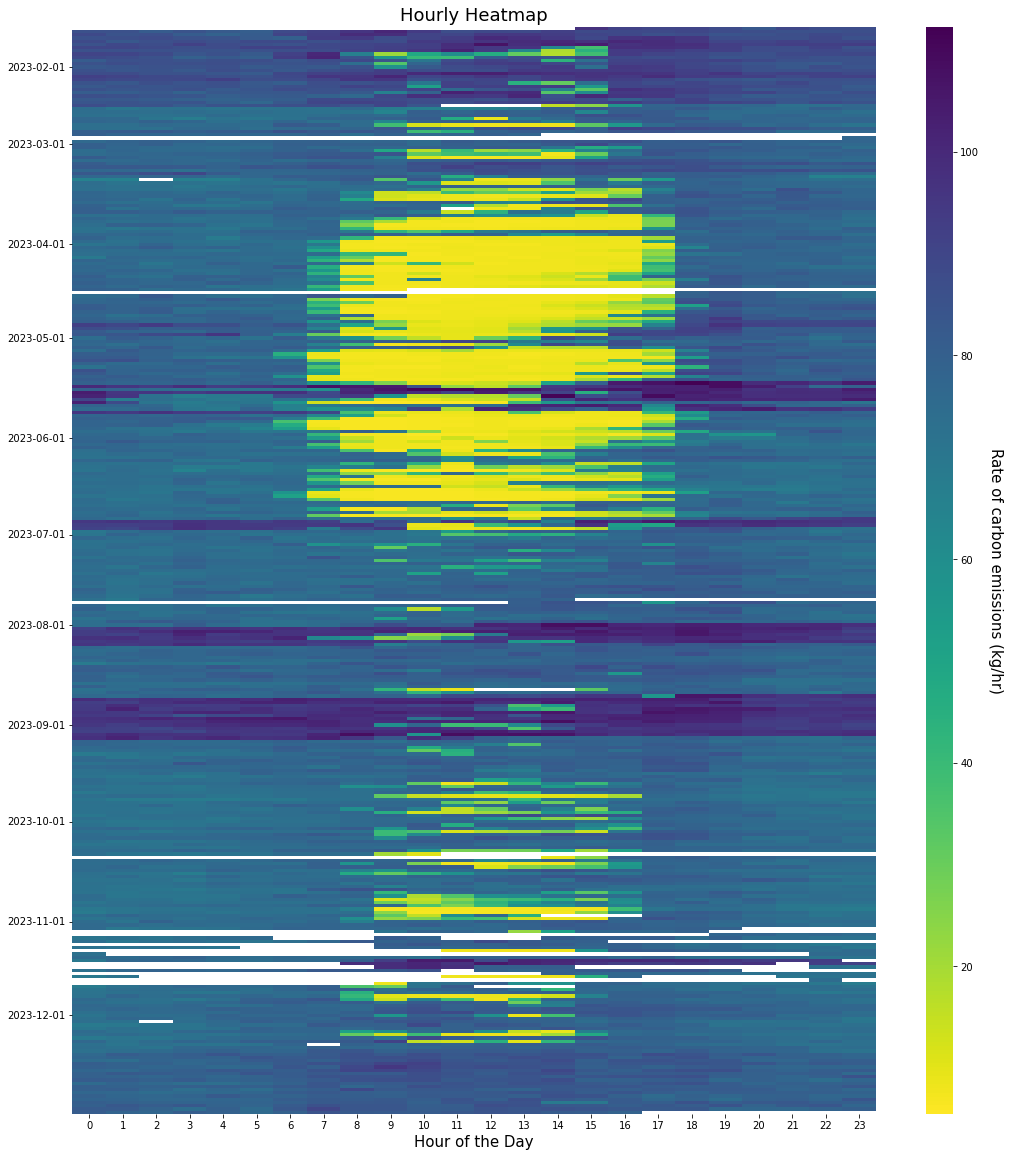

In [35]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Rate of carbon emissions (kg/hr)', figsize=(18, 20))

Get overall dataframe

In [36]:
df_all = pd.merge(df_emissions[['datetime', 'HVAC']], df_climate, on = 'datetime', how = 'outer')
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)

Load shift potential and hourly carbon emissions breakdown by time windows

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


Text(0.5, 0.98, 'Rate of carbon emissions distribution by hour of the day')

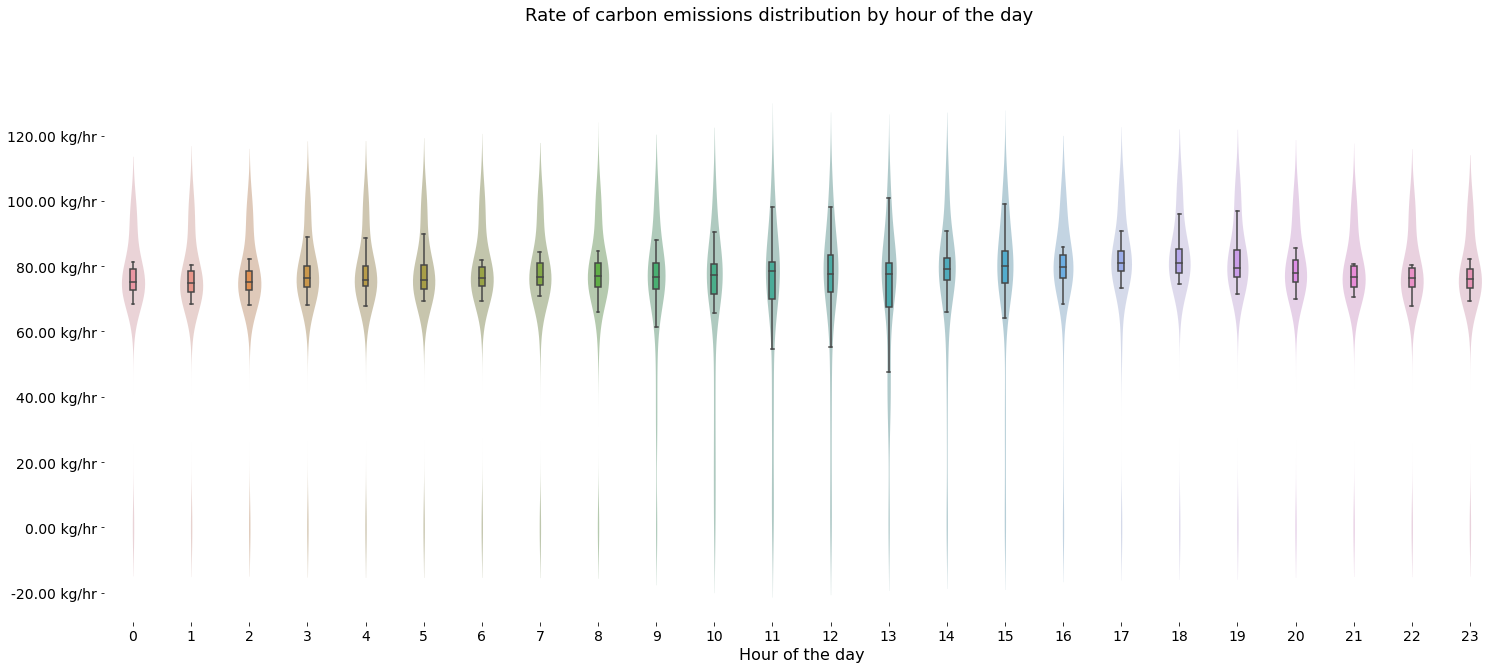

In [37]:
# Time window: August ~ September

df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 7) & (df_hourly['datetime'].dt.month <= 9)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
# Ensure Datetime is the index
df_hourly_emissions['Hour'] = df_hourly_emissions['datetime'].dt.hour

# Pivot table to rearrange the DataFrame
df_pivot = df_hourly_emissions.pivot_table(index=df_hourly_emissions['datetime'].dt.date, columns='Hour', values='HVAC', aggfunc='sum')
df_pivot.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(25, 10))
utils_plot.create_violin_plot(df_pivot, range(0, 24), ' kg/hr', axe=ax, annotation=False, hide_xticks=False, xlabel='Hour of the day')
fig.suptitle('Rate of carbon emissions distribution by hour of the day', fontsize=18)

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


Text(0.5, 0.98, 'Rate of carbon emissions distribution by hour of the day')

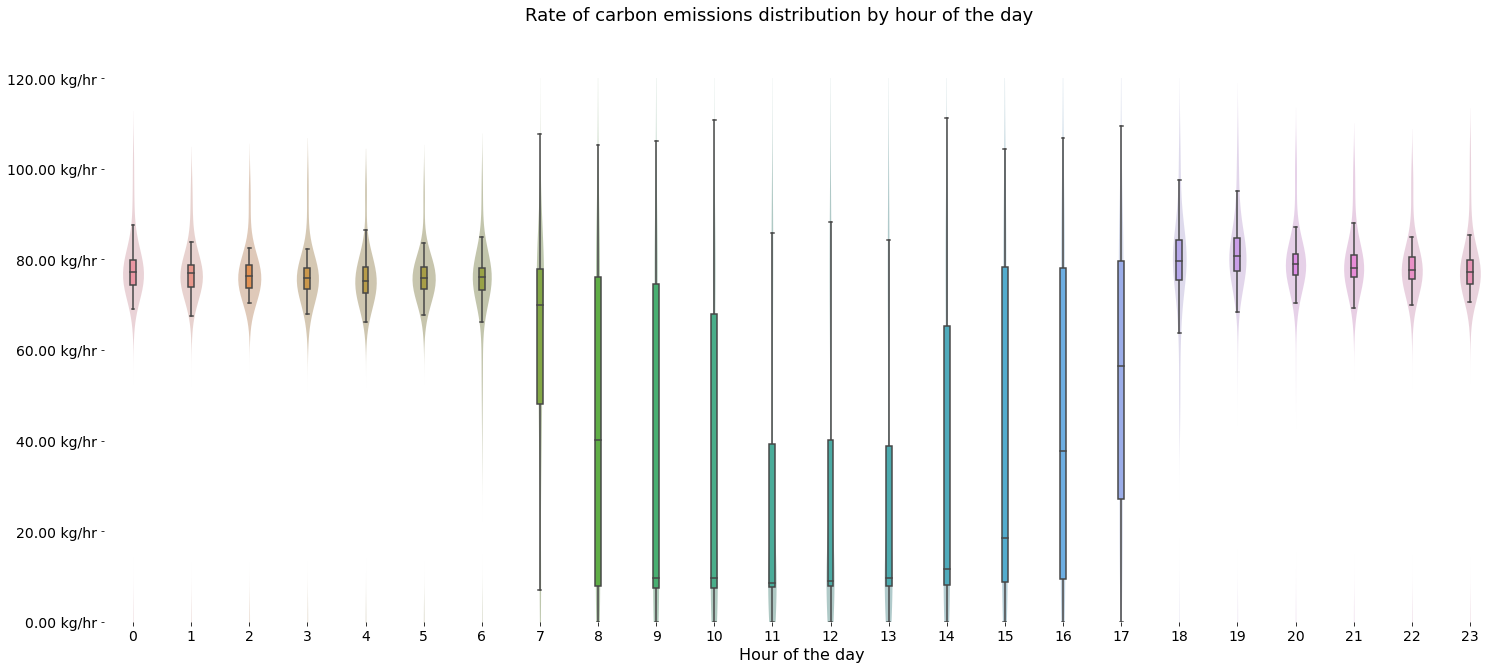

In [38]:
# Time window: March ~ July
df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 3) & (df_hourly['datetime'].dt.month <= 6)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
# Ensure Datetime is the index
df_hourly_emissions['Hour'] = df_hourly_emissions['datetime'].dt.hour

# Pivot table to rearrange the DataFrame
df_pivot = df_hourly_emissions.pivot_table(index=df_hourly_emissions['datetime'].dt.date, columns='Hour', values='HVAC', aggfunc='sum')
df_pivot.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(25, 10))
utils_plot.create_violin_plot(df_pivot, range(0, 24), ' kg/hr', axe=ax, annotation=False, hide_xticks=False, xlabel='Hour of the day', ylim=[0, 120])
fig.suptitle('Rate of carbon emissions distribution by hour of the day', fontsize=18)

## Task 3: Examing carbon emissions for lighting and plug-load

In [39]:
ltg_pl = df_power['SDH.SW.MSB.CB4A.PWR REAL 3 P']
df_ltg_pl = pd.DataFrame({'datetime': df_power['datetime'], 'ltg_pl': ltg_pl})
columns = ['ltg_pl']
df_ltg_pl.head()

,datetime,ltg_pl
0,2023-01-20 15:45:00-08:00,55.999
1,2023-01-20 16:00:00-08:00,55.999
2,2023-01-20 16:15:00-08:00,57.999
3,2023-01-20 16:30:00-08:00,55.999
4,2023-01-20 16:45:00-08:00,54.999


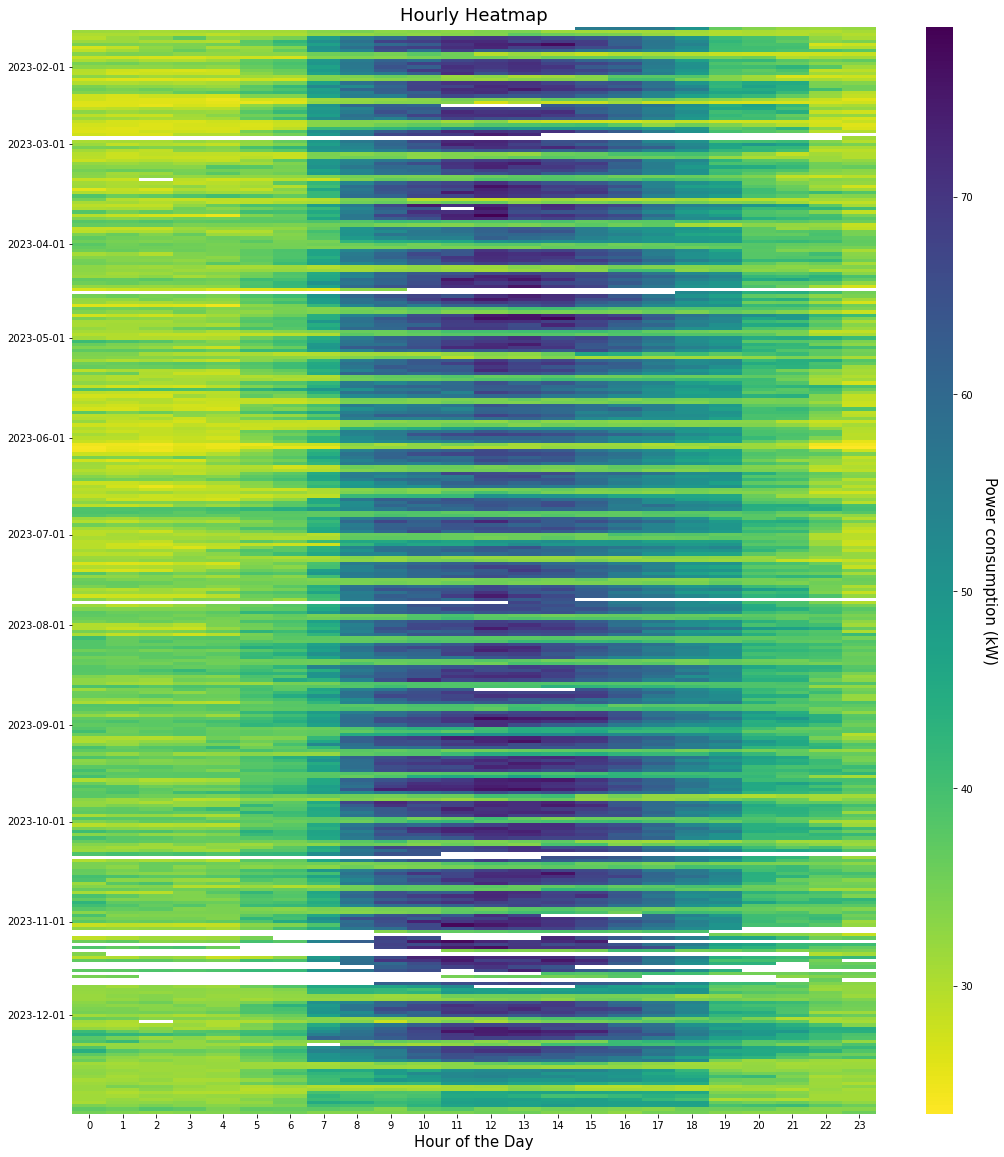

In [40]:
utils_plot.plot_hourly_heatmap(df_ltg_pl, columns, 'Power consumption (kW)', figsize=(18, 20))

In [41]:
df_temp = pd.merge(df_ltg_pl, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,ltg_pl
0,2023-01-20 15:45:00-08:00,26.542182
1,2023-01-20 16:00:00-08:00,25.618460
2,2023-01-20 16:15:00-08:00,26.340323
3,2023-01-20 16:30:00-08:00,25.372699
4,2023-01-20 16:45:00-08:00,24.927930


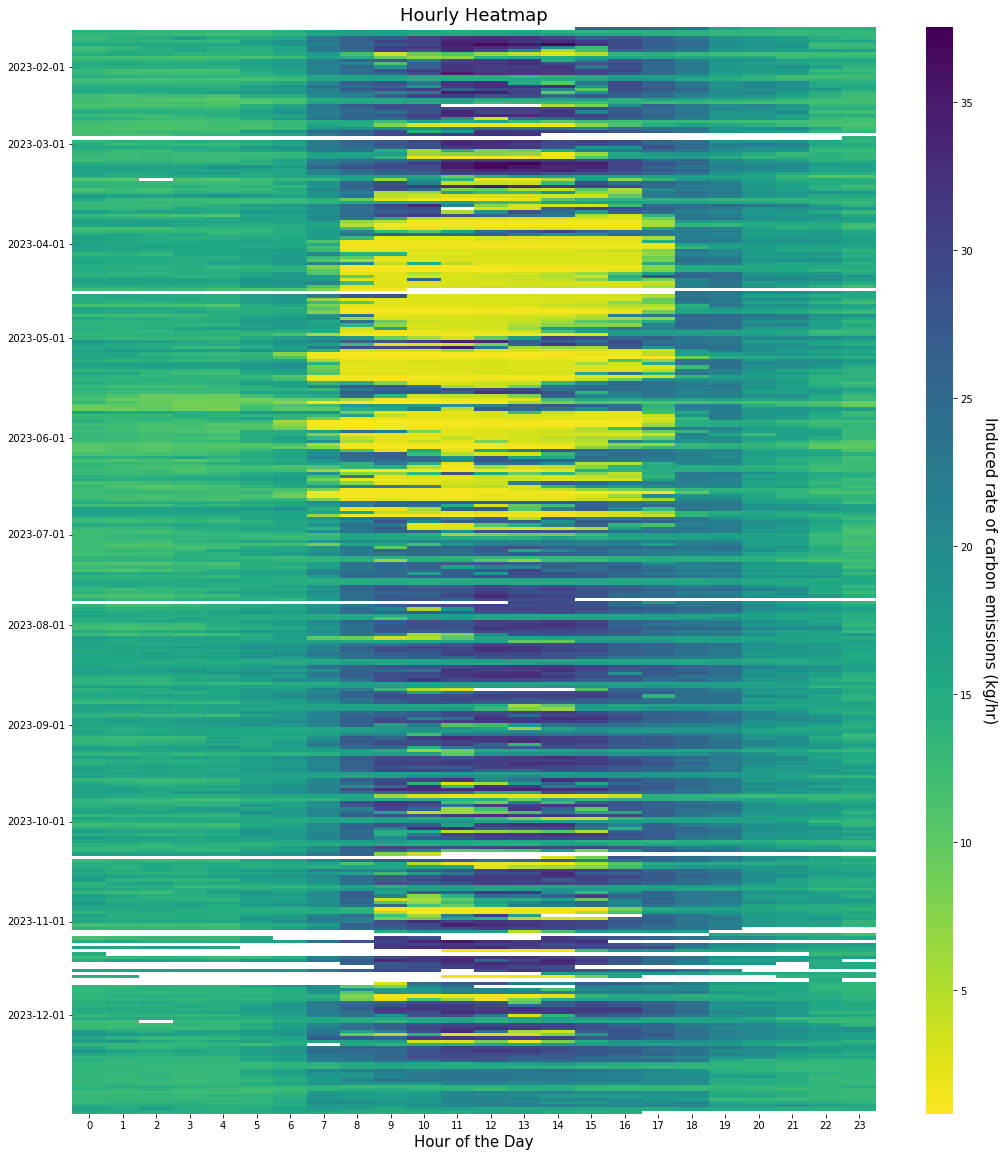

In [42]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Induced rate of carbon emissions (kg/hr)', figsize=(18, 20))

Get overall dataframe

In [43]:
df_all = pd.merge(df_emissions[['datetime', 'ltg_pl']], df_climate, on = 'datetime', how = 'outer')
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)

Load shift potential and hourly carbon emissions breakdown by time windows

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


Text(0.5, 0.98, 'Rate of carbon emissions distribution by hour of the day')

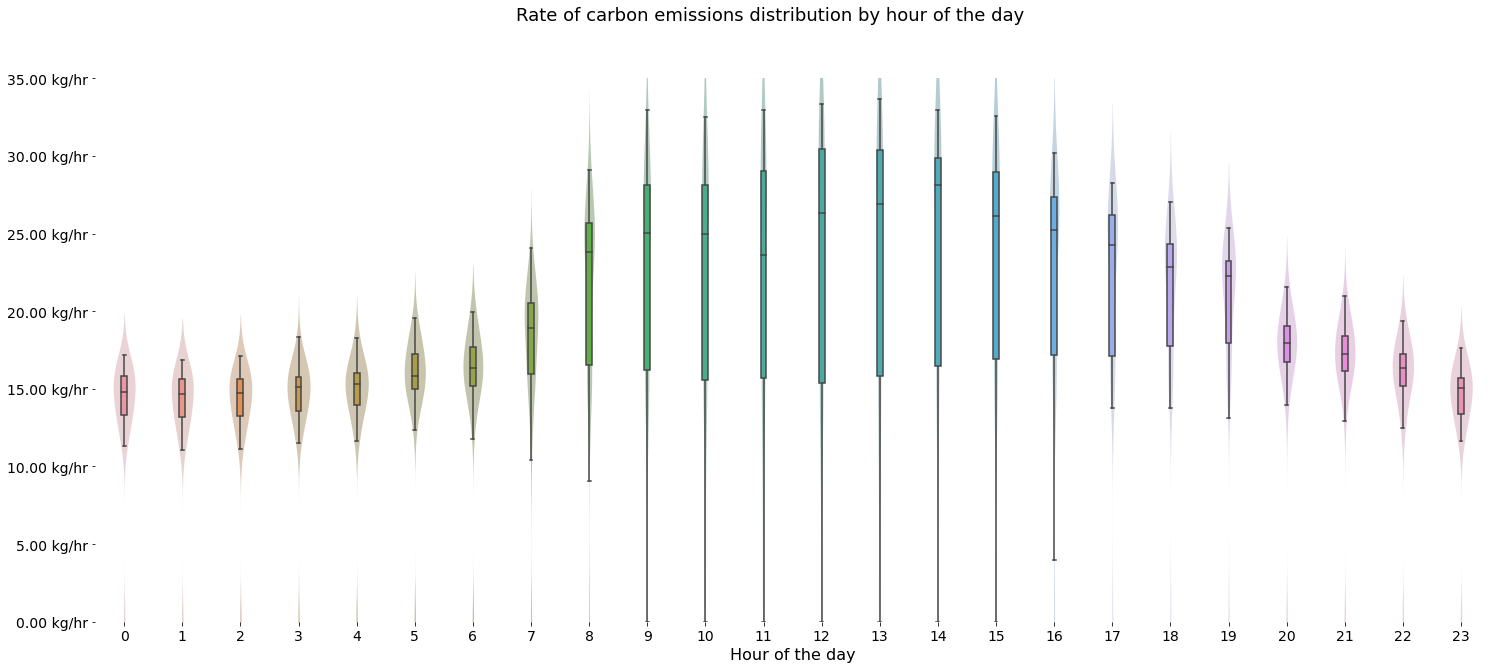

In [44]:
# Time window: August ~ September

df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 7) & (df_hourly['datetime'].dt.month <= 9)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
# Ensure Datetime is the index
df_hourly_emissions['Hour'] = df_hourly_emissions['datetime'].dt.hour

# Pivot table to rearrange the DataFrame
df_pivot = df_hourly_emissions.pivot_table(index=df_hourly_emissions['datetime'].dt.date, columns='Hour', values='ltg_pl', aggfunc='sum')
df_pivot.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(25, 10))
utils_plot.create_violin_plot(df_pivot, range(0, 24), ' kg/hr', axe=ax, annotation=False, hide_xticks=False, xlabel='Hour of the day', ylim=[0, 35])
fig.suptitle('Rate of carbon emissions distribution by hour of the day', fontsize=18)

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


Text(0.5, 0.98, 'Rate of carbon emissions distribution by hour of the day')

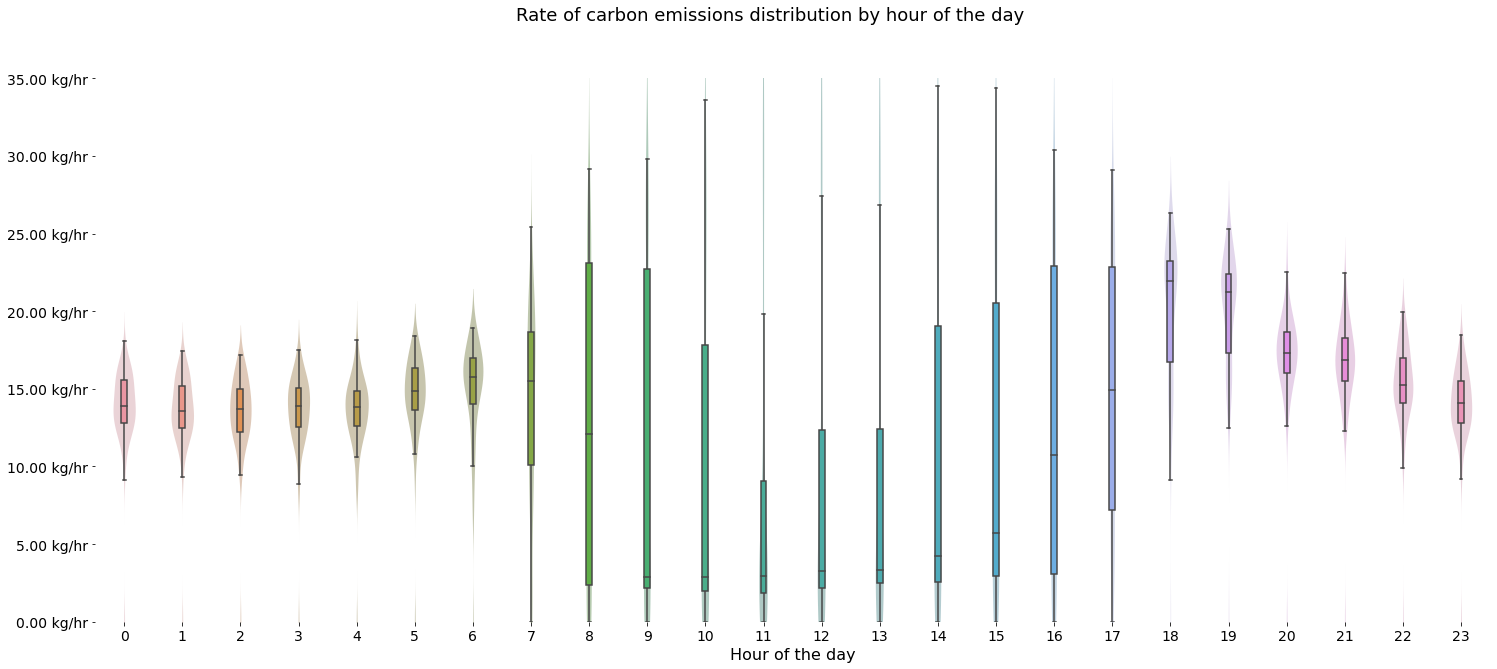

In [45]:
# Time window: March ~ July
df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 3) & (df_hourly['datetime'].dt.month <= 6)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
# Ensure Datetime is the index
df_hourly_emissions['Hour'] = df_hourly_emissions['datetime'].dt.hour

# Pivot table to rearrange the DataFrame
df_pivot = df_hourly_emissions.pivot_table(index=df_hourly_emissions['datetime'].dt.date, columns='Hour', values='ltg_pl', aggfunc='sum')
df_pivot.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(25, 10))
utils_plot.create_violin_plot(df_pivot, range(0, 24), ' kg/hr', axe=ax, annotation=False, hide_xticks=False, xlabel='Hour of the day', ylim=[0, 35])
fig.suptitle('Rate of carbon emissions distribution by hour of the day', fontsize=18)

## Task 4: Calculate load shift potential for chiller (Assume chiller setpoint reset)

In [46]:
# Define the conversion function
def f2c(df, column_name):

    # Convert the column from °F to °C
    df[column_name] = (df[column_name] - 32) * 5/9
    return df

Calculate chiller efficiency kW/ton

In [47]:
# Define the function to calculate wet-bulb temperature
def calculate_wetbulb(df):
    # Constants for the approximation formula
    c1, c2, c3, c4, c5, c6, c7 = 0.151977, 8.313659, 1.676331, 0.00391838, 0.023101, 4.686035, 0.00000022
    
    # Extracting dry-bulb temperature (Tdb) and relative humidity (RH) from the dataframe
    Tdb = df['t_out']
    RH = df['rh_out']
    
    # Convert RH from percentage to fraction
    RH_frac = RH / 100.0
    
    # Calculate wet-bulb temperature using the approximation formula
    Twb = Tdb * np.arctan(c1 * (RH_frac + c2)**0.5) + \
          np.arctan(Tdb + RH_frac) - np.arctan(RH_frac - c3) + \
          c4 * (RH_frac)**1.5 * np.arctan(c5 * RH_frac) - c6 + \
          c7 * Tdb * RH_frac**2  # This term is typically very small and can be ignored for most practical purposes
    
    df['wb_temp'] = Twb
    return df


/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_11780/1091864672.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onicon_train['eff'] =  onicon_train['power'] / onicon_train['thermal']


Avg eff (kW/ton): 0.5840341262816083
Root mean Squared Error: 0.11358858658230792
Intercept: 0.7834273205026691
Slope: [-2.00893740e-02 -2.00648180e-03 -1.57320009e-03  3.88800421e-05]


/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


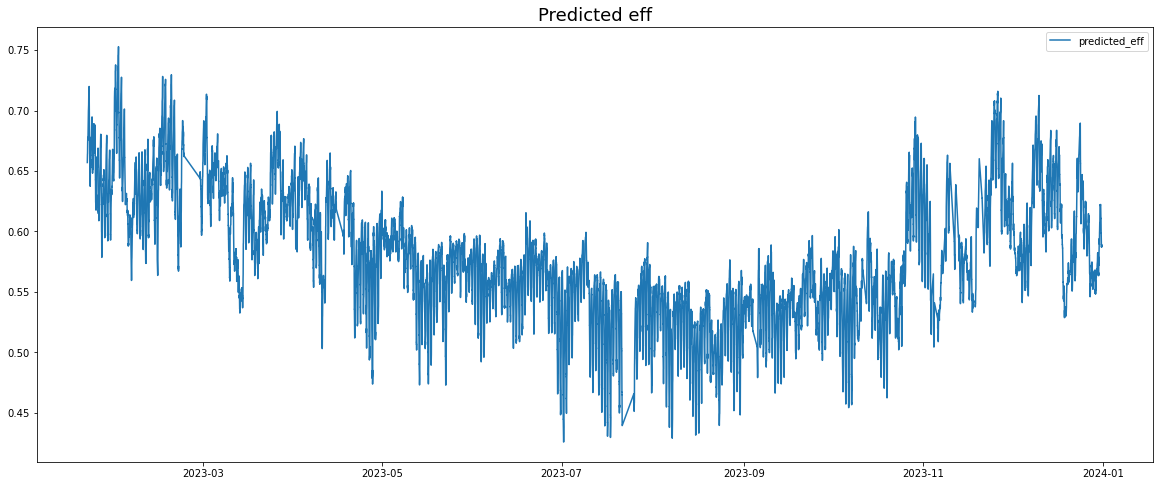

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


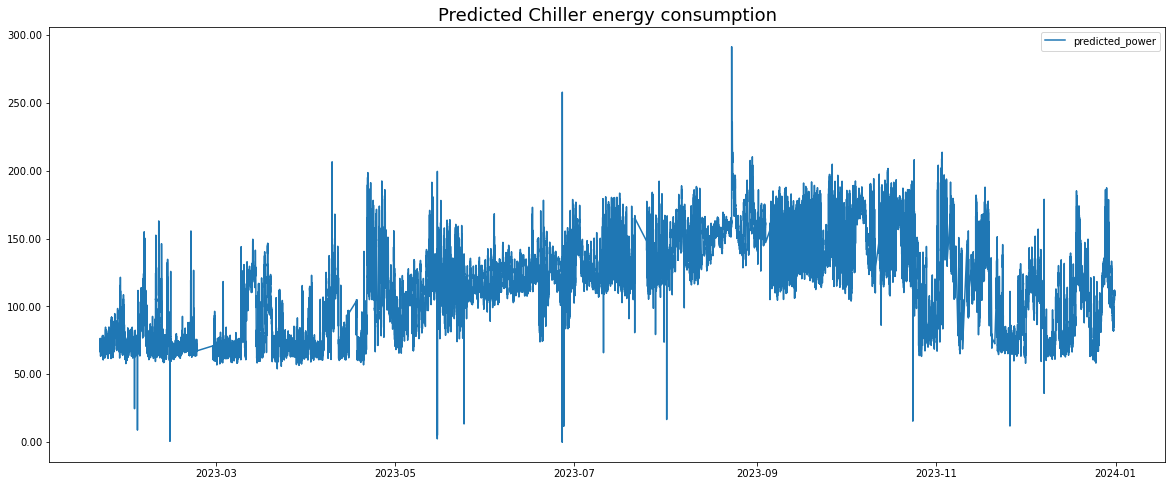

RMSE for power consumption: 13.643071805826612


/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_11780/1091864672.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onicon_test['diff'] = onicon_test['power'] - onicon_test['predicted_power']


In [48]:
# Read dataframe
df_climate = calculate_wetbulb(df_climate)

ch2 = df_power[['datetime', 'SDH.SW.MSA.CH-2.PWR REAL 3 P']]

onicon_df = pd.read_csv("./ls_ctr/onicon.csv")
onicon_df['datetime'] = pd.to_datetime(onicon_df['datetime'])
onicon_df['datetime'] = onicon_df['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)

# Merge
onicon_df = pd.merge(pd.merge(ch2, df_climate, on='datetime', how='inner'), onicon_df, on='datetime', how="inner")

# Clean
onicon_df.rename(columns={'SDH.SW.MSA.CH-2.PWR REAL 3 P': 'power'}, inplace=True)
onicon_df.dropna(inplace=True)

onicon_df['time_of_week'] = ((onicon_df['datetime'].dt.dayofweek * 24 * 60) +  # Total minutes from days
                      (onicon_df['datetime'].dt.hour * 60) +           # Total minutes from hours
                      onicon_df['datetime'].dt.minute                   # Minutes
                     ) / 15  

# Train dataframe

onicon_train = onicon_df[onicon_df['power'] > 10]
onicon_train['eff'] =  onicon_train['power'] / onicon_train['thermal']

print('Avg eff (kW/ton):', onicon_train['eff'].mean())

# build linear models for eff based on outside temperature
# Reshape x to be a 2D array
X = onicon_train[['wb_temp', 'air_temp', 'rh_out', 'time_of_week']]
y = onicon_train['eff'].values

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the Mean Squared Error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f'Root mean Squared Error: {rmse}')

# Print the coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

# make prediction on the entire dataset based on measured weather
eff_pred = model.predict(onicon_df[['wb_temp', 'air_temp', 'rh_out', 'time_of_week']])
onicon_df["predicted_eff"] = eff_pred

utils_plot.make_plot(onicon_df, ["predicted_eff"], plot_title="Predicted eff", figsize=(20, 8))

onicon_df["predicted_power"] = onicon_df['thermal'] * onicon_df["predicted_eff"]
utils_plot.make_plot(onicon_df, ["predicted_power"], plot_title="Predicted Chiller energy consumption", figsize=(20, 8))

onicon_test = onicon_df[onicon_df['power'] > 10]
onicon_test['diff'] = onicon_test['power'] - onicon_test['predicted_power']
kw_rmse = np.sqrt(np.mean((onicon_test['power'] - onicon_test['predicted_power']) ** 2))
print('RMSE for power consumption:', kw_rmse)

Load shift analysis based on moer signal

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


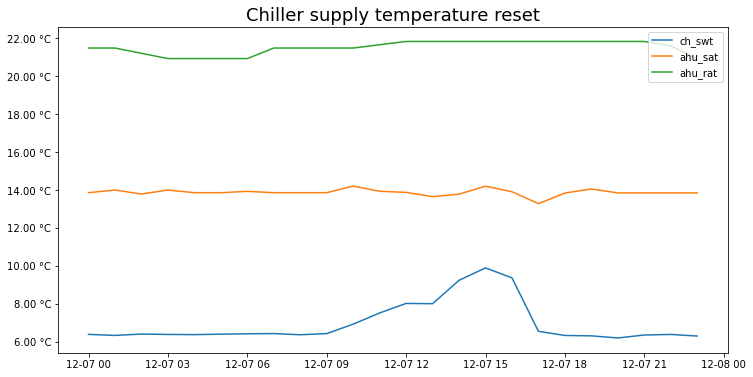

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


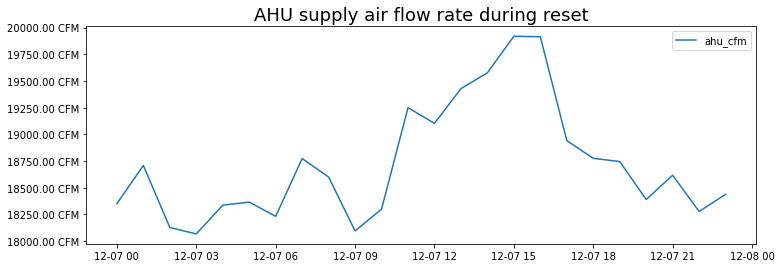

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


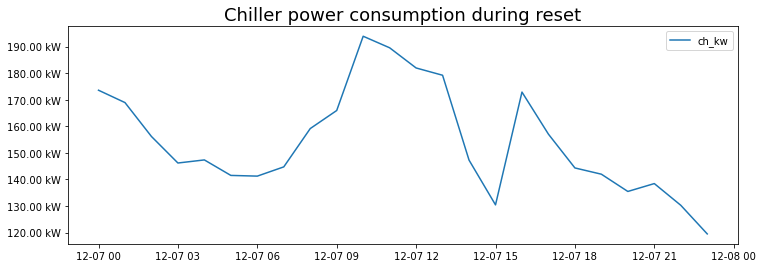

In [49]:
# load setpoint reset data
reset_df = pd.read_csv("./ls_ctr/spt_reset.csv")
reset_df['datetime'] = pd.to_datetime(reset_df['datetime']).dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
reset_df.set_index('datetime', inplace=True)
reset_df = reset_df.resample('1H').mean()
reset_df.reset_index(inplace=True)
reset_df = f2c(reset_df, ['ch_swt', 'ahu_sat', 'ahu_rat'])
utils_plot.make_plot(reset_df, ['ch_swt', 'ahu_sat', 'ahu_rat'], unit=" °C", plot_title="Chiller supply temperature reset", figsize=(12, 6))
utils_plot.make_plot(reset_df, ['ahu_cfm'], unit=" CFM", plot_title="AHU supply air flow rate during reset", figsize=(12, 4))
utils_plot.make_plot(reset_df, ['ch_kw'], unit=" kW", plot_title="Chiller power consumption during reset", figsize=(12, 4))

In [50]:
# Create a complete time range for comparison
start_date = onicon_df['datetime'].min()
end_date = onicon_df['datetime'].max()
full_range = pd.date_range(start=start_date, end=end_date, freq='15 min')
full_df = pd.DataFrame(full_range, columns=['datetime'])

# Merge the complete range with the existing DataFrame
df_ls = full_df.merge(onicon_df, on='datetime', how='left')

# Identify days with any data and days with complete data missing
df_ls['date'] = df_ls['datetime'].dt.date  # separate date for grouping
day_data_count = df_ls.groupby('date')['predicted_power'].count()
missing_days = day_data_count[day_data_count <= 4 * 15].index  # days with all data missing
print("Missing days in the dataframe:", missing_days)

# # Drop days with all data missing
df_ls = df_ls[~df_ls['date'].isin(missing_days)]
# df_ls.dropna(inplace=True)

# Linear interpolation for missing values within days that have some data
df_ls['predicted_power'] = df_ls.groupby('date')['predicted_power'].apply(lambda group: group.interpolate(method='linear'))

# Combine datafram
df_ls = pd.merge(df_ls, df_moer, on='datetime', how='inner')
df_ls['emissions'] = df_ls['predicted_power'] * df_ls['moer'] / 1000
df_ls = df_ls[['datetime', 'predicted_power', 'moer', 'emissions']]

Missing days in the dataframe: Index([2023-01-20, 2023-02-22, 2023-02-23, 2023-02-24, 2023-02-25, 2023-02-26,
       2023-02-27, 2023-04-15, 2023-04-16, 2023-04-17, 2023-07-21, 2023-07-22,
       2023-07-23, 2023-07-24, 2023-07-25, 2023-09-04, 2023-09-05, 2023-10-11,
       2023-10-12, 2023-11-04, 2023-11-05, 2023-11-08, 2023-11-10, 2023-11-11,
       2023-11-12, 2023-11-15, 2023-11-16, 2023-11-18, 2023-11-19, 2023-11-20,
       2023-11-21],
      dtype='object', name='date')


Annual analysis on load shift

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


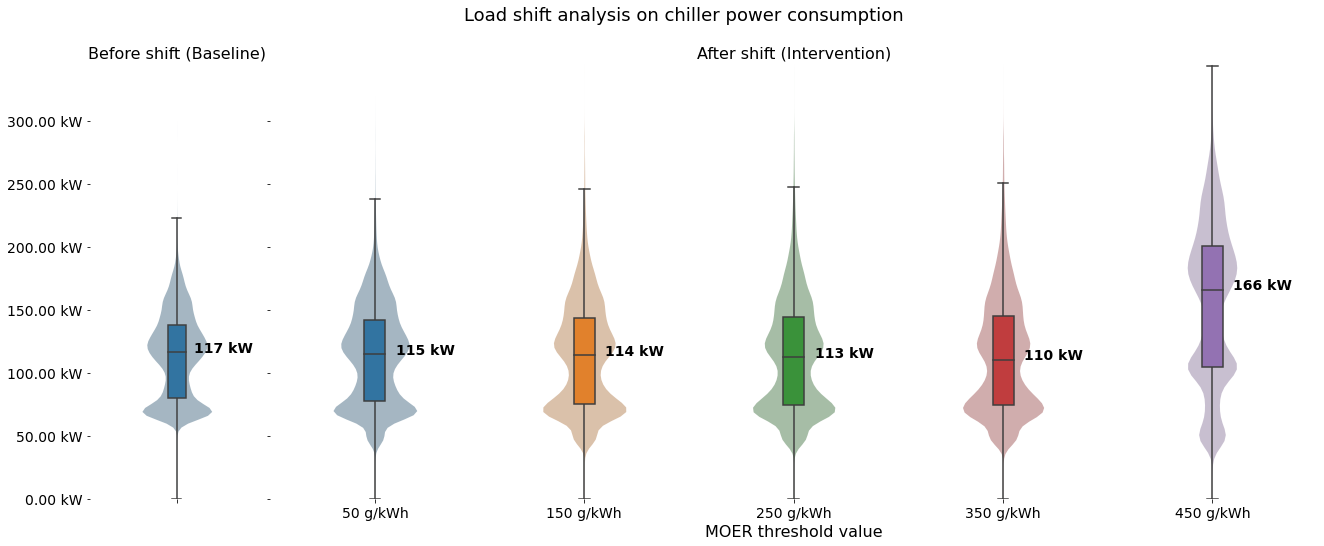

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


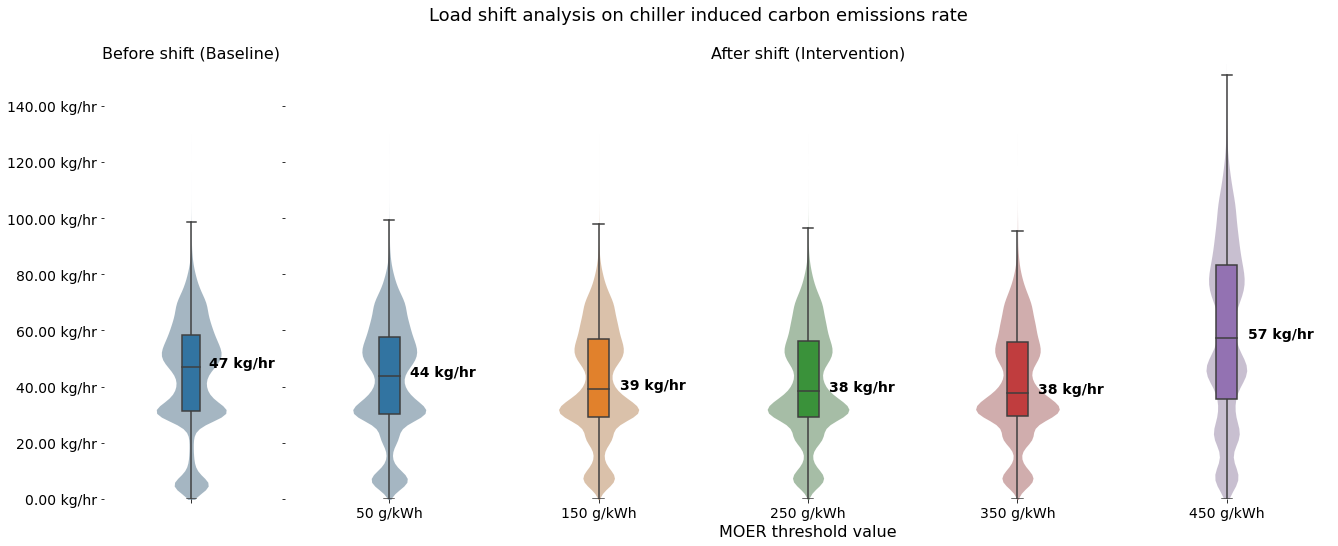

In [51]:
# Chiller 30% setpoint reset
df_power_shift = pd.DataFrame()
df_emissions_shift = pd.DataFrame()

df_base = df_ls
# df_base = df_ls[(df_ls['datetime'].dt.month >= 3) & (df_ls['datetime'].dt.month <= 6)]
for threshold in range(50, 500, 100):
    potential_power, potential_emissions, deposit_list, activation = utils_shift.shift(threshold, df_base)
    df_power_shift['{} g/kWh'.format(threshold)] = potential_power
    df_emissions_shift['{} g/kWh'.format(threshold)] = potential_emissions

fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_violin_plot(df_base, ['predicted_power'], ' kW', axs[0], plot_title='Before shift (Baseline)', hide_xticks=True, ylim=[0, 345])
utils_plot.create_violin_plot(df_power_shift, df_power_shift.columns, ' kW', axs[1], plot_title='After shift (Intervention)', hide_xticks=False, xlabel='MOER threshold value', ylim=[0, 345])
fig.suptitle('Load shift analysis on chiller power consumption', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_violin_plot(df_base, ['emissions'], ' kg/hr', axs[0], plot_title='Before shift (Baseline)', hide_xticks=True, ylim=[0, 155])
utils_plot.create_violin_plot(df_emissions_shift, df_power_shift.columns, ' kg/hr', axs[1], plot_title='After shift (Intervention)', hide_xticks=False, xlabel='MOER threshold value', ylim=[0, 155])
fig.suptitle('Load shift analysis on chiller induced carbon emissions rate', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


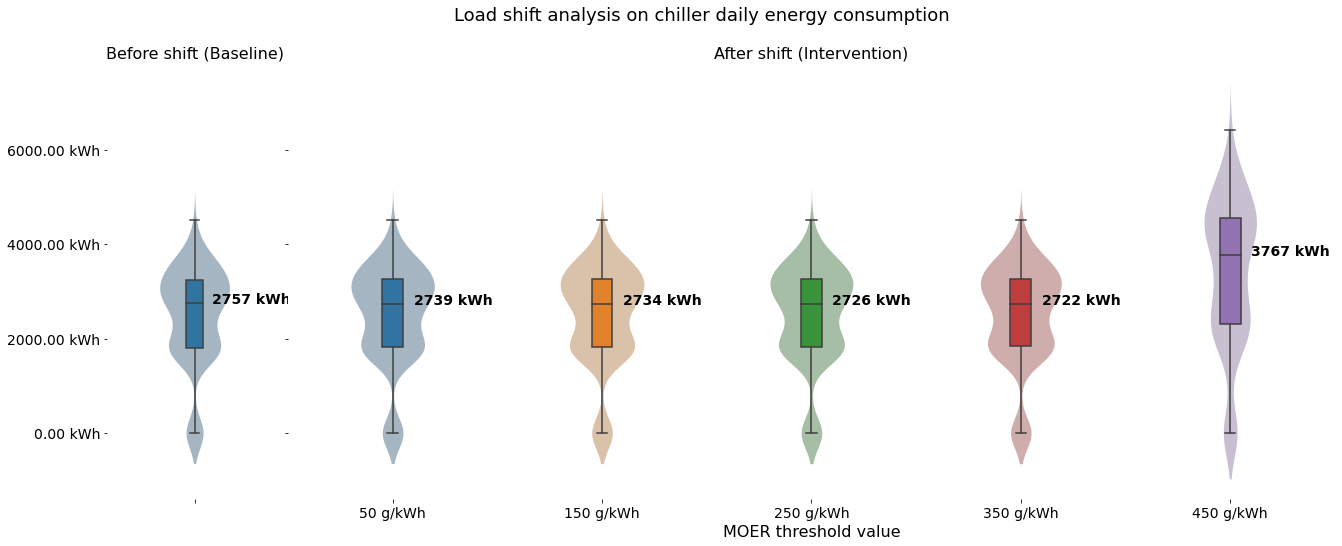

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


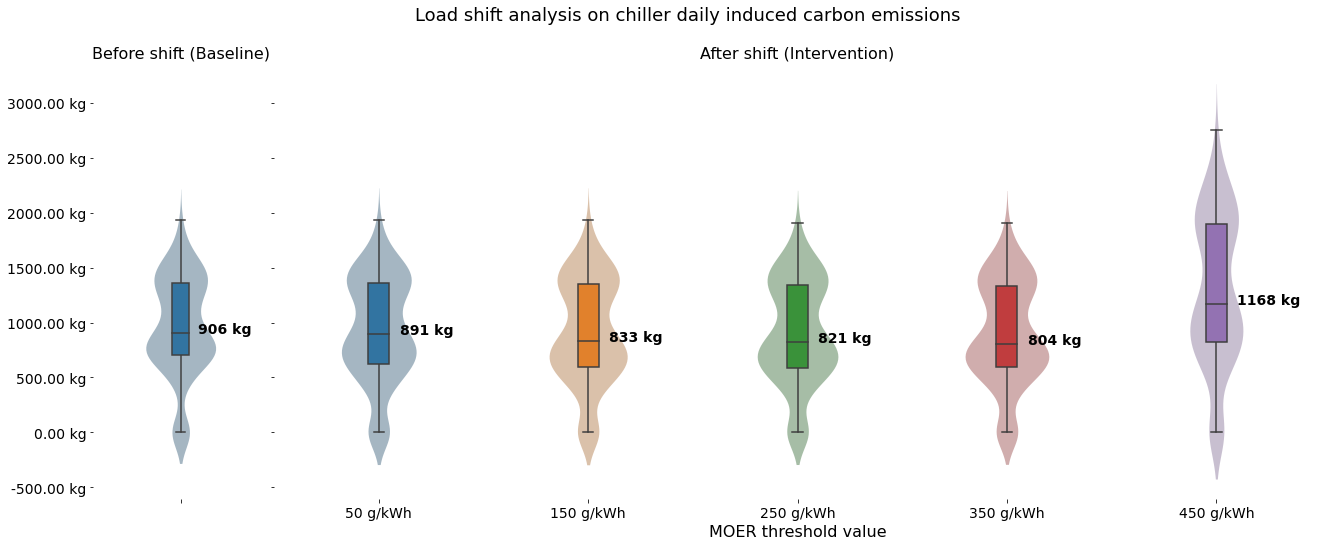

In [52]:
daily_sum = df_base.set_index('datetime')
daily_sum = daily_sum[['predicted_power', 'emissions']].resample('D').sum() * 0.25
daily_sum.reset_index(inplace=True)

df_power_shift['datetime'] = df_base['datetime']
daily_power_shift = df_power_shift.set_index('datetime')
daily_power_shift = daily_power_shift.resample('D').sum() * 0.25
daily_power_shift.reset_index(inplace=True)

df_emissions_shift['datetime'] = df_base['datetime']
daily_emissions_shift = df_emissions_shift.set_index('datetime')
daily_emissions_shift = daily_emissions_shift.resample('D').sum() * 0.25
daily_emissions_shift.reset_index(inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_violin_plot(daily_sum, ['predicted_power'], ' kWh', axs[0], plot_title='Before shift (Baseline)', hide_xticks=True)
utils_plot.create_violin_plot(daily_power_shift, daily_power_shift.columns[1:], ' kWh', axs[1], plot_title='After shift (Intervention)', hide_xticks=False, xlabel='MOER threshold value')
fig.suptitle('Load shift analysis on chiller daily energy consumption', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_violin_plot(daily_sum, ['emissions'], ' kg', axs[0], plot_title='Before shift (Baseline)', hide_xticks=True)
utils_plot.create_violin_plot(daily_emissions_shift, daily_emissions_shift.columns[1:], ' kg', axs[1], plot_title='After shift (Intervention)', hide_xticks=False, xlabel='MOER threshold value')
fig.suptitle('Load shift analysis on chiller daily induced carbon emissions', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

Moving average comparison (for demand charge)

/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_11780/2463087125.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MA['datetime'] = df_MA['datetime'].dt.time.astype(str)
/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_11780/2463087125.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MA['datetime'] = df_MA['datetime'].dt.time.astype(str)
/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_11780/2463087125.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

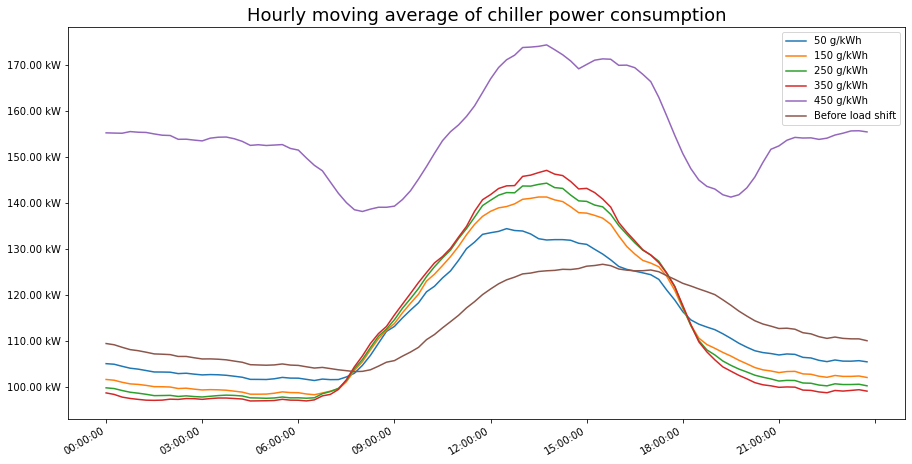

In [53]:
df_ls['MA_power'] = df_ls['predicted_power'].rolling(window=4, min_periods=1).mean()

plt.figure(figsize=[15, 8])

for threshold in range(50, 500, 100):
    df_ls['MA_potential_power'] = df_power_shift['{} g/kWh'.format(threshold)].rolling(window=4, min_periods=1).mean()
    df_MA = df_ls[['datetime', 'MA_power', 'MA_potential_power']]
    df_MA['datetime'] = df_MA['datetime'].dt.time.astype(str)
    df_MA = df_MA.groupby('datetime').mean()
    df_MA.reset_index(inplace=True)
    plt.plot(df_MA['datetime'], df_MA['MA_potential_power'], label = "{} g/kWh".format(threshold))

plt.plot(df_MA['datetime'], df_MA['MA_power'], label = "Before load shift")

# Format date ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(12))  # Show a date tick every 12 hours
plt.gcf().autofmt_xdate()  # Rotate the dates for better legibility
unit = ' kW'
y_ticks = plt.gca().get_yticks()  # Get the current y-tick values
plt.gca().set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
plt.title("Hourly moving average of chiller power consumption", fontsize = 18)
plt.legend()

Time window analysis on load shift

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


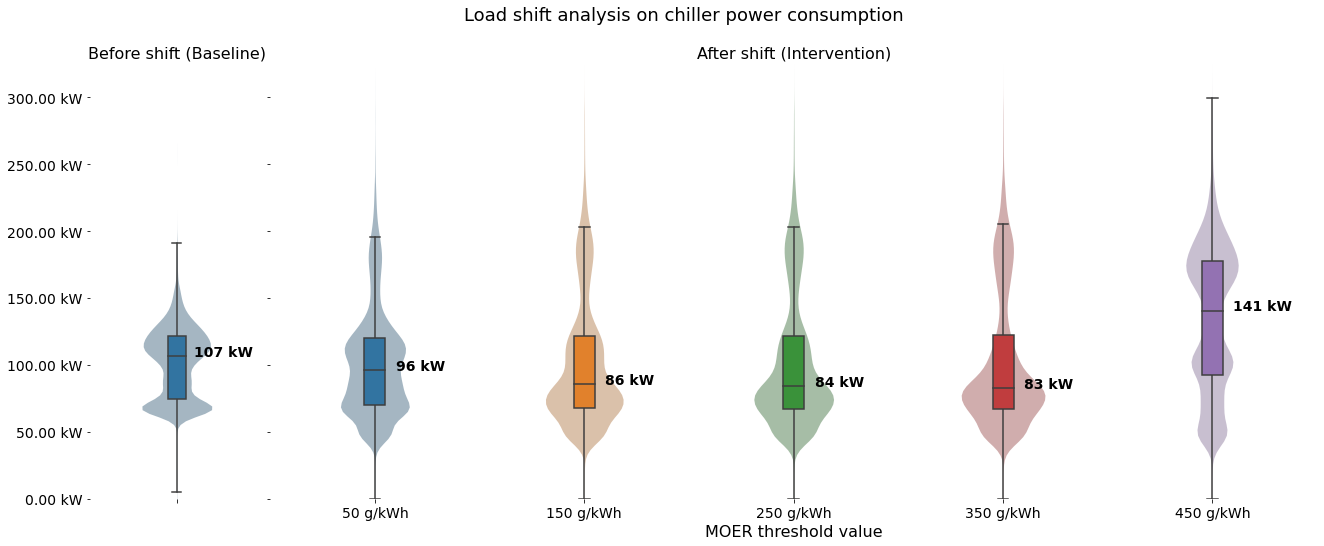

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


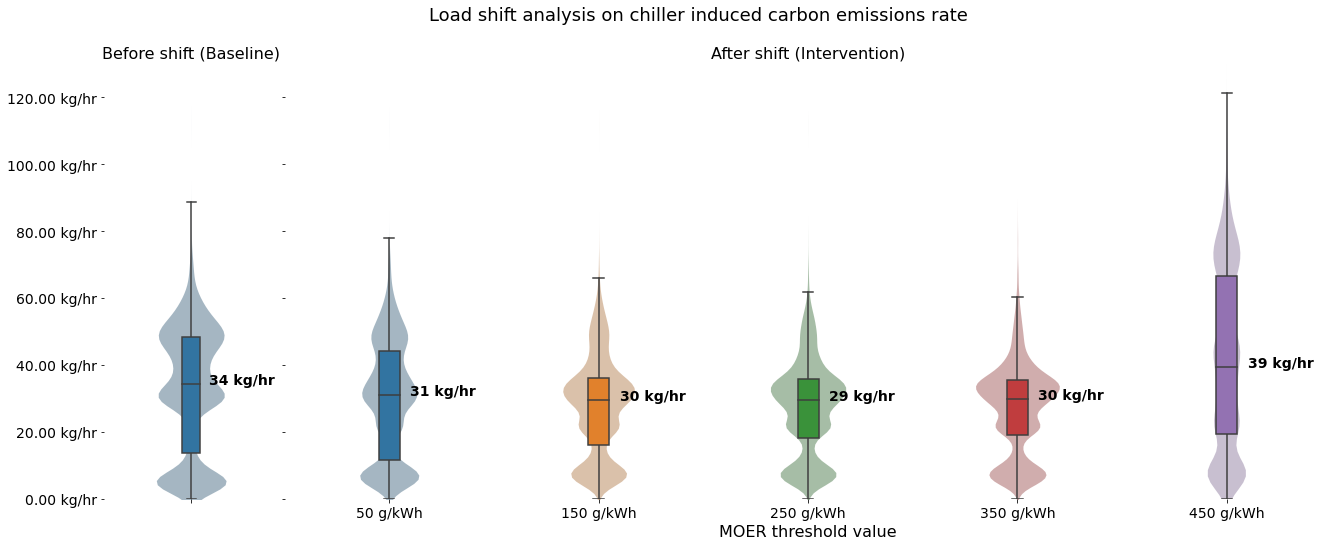

In [54]:
# Chiller 30% setpoint reset
df_power_shift = pd.DataFrame()
df_emissions_shift = pd.DataFrame()

# df_base = df_ls
df_base = df_ls[(df_ls['datetime'].dt.month >= 3) & (df_ls['datetime'].dt.month <= 6)]
for threshold in range(50, 500, 100):
    potential_power, potential_emissions, deposit_list, activation = utils_shift.shift(threshold, df_base)
    df_power_shift['{} g/kWh'.format(threshold)] = potential_power
    df_emissions_shift['{} g/kWh'.format(threshold)] = potential_emissions

fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_violin_plot(df_base, ['predicted_power'], ' kW', axs[0], plot_title='Before shift (Baseline)', hide_xticks=True, ylim=[0, 325])
utils_plot.create_violin_plot(df_power_shift, df_power_shift.columns, ' kW', axs[1], plot_title='After shift (Intervention)', hide_xticks=False, xlabel='MOER threshold value', ylim=[0, 325])
fig.suptitle('Load shift analysis on chiller power consumption', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_violin_plot(df_base, ['emissions'], ' kg/hr', axs[0], plot_title='Before shift (Baseline)', hide_xticks=True, ylim=[0, 130])
utils_plot.create_violin_plot(df_emissions_shift, df_power_shift.columns, ' kg/hr', axs[1], plot_title='After shift (Intervention)', hide_xticks=False, xlabel='MOER threshold value', ylim=[0, 130])
fig.suptitle('Load shift analysis on chiller induced carbon emissions rate', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


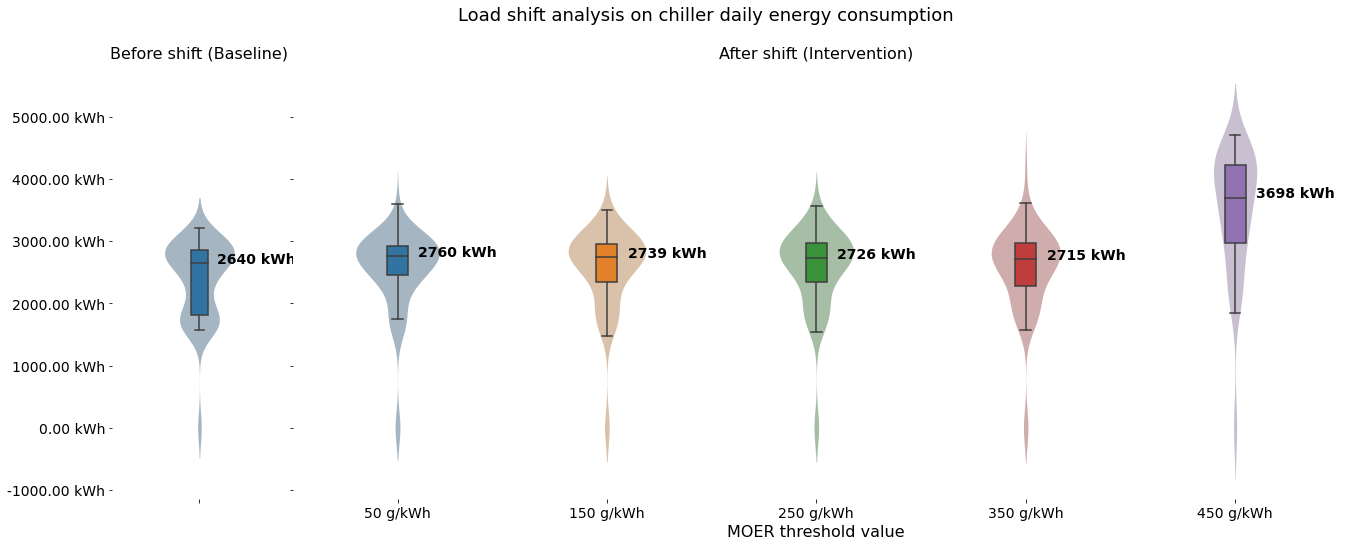

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


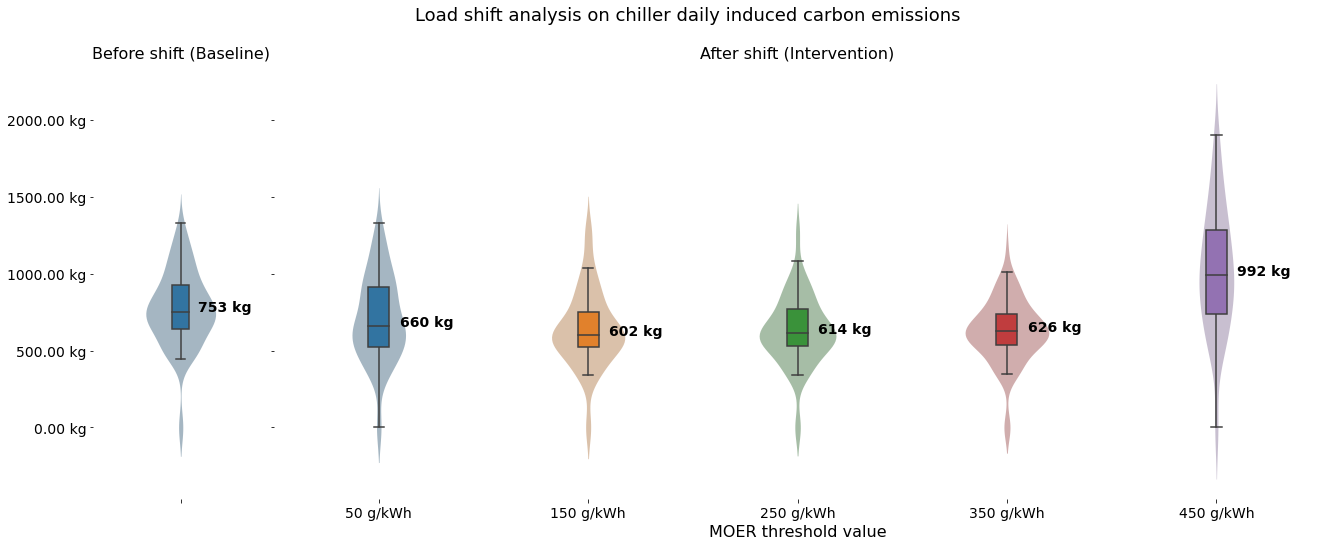

In [55]:
daily_sum = df_base.set_index('datetime')
daily_sum = daily_sum[['predicted_power', 'emissions']].resample('D').sum() * 0.25
daily_sum.reset_index(inplace=True)

df_power_shift['datetime'] = df_base['datetime']
daily_power_shift = df_power_shift.set_index('datetime')
daily_power_shift = daily_power_shift.resample('D').sum() * 0.25
daily_power_shift.reset_index(inplace=True)

df_emissions_shift['datetime'] = df_base['datetime']
daily_emissions_shift = df_emissions_shift.set_index('datetime')
daily_emissions_shift = daily_emissions_shift.resample('D').sum() * 0.25
daily_emissions_shift.reset_index(inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_violin_plot(daily_sum, ['predicted_power'], ' kWh', axs[0], plot_title='Before shift (Baseline)', hide_xticks=True)
utils_plot.create_violin_plot(daily_power_shift, daily_power_shift.columns[1:], ' kWh', axs[1], plot_title='After shift (Intervention)', hide_xticks=False, xlabel='MOER threshold value')
fig.suptitle('Load shift analysis on chiller daily energy consumption', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(22, 8), sharey=True, gridspec_kw={'width_ratios': [1, 6]})
utils_plot.create_violin_plot(daily_sum, ['emissions'], ' kg', axs[0], plot_title='Before shift (Baseline)', hide_xticks=True)
utils_plot.create_violin_plot(daily_emissions_shift, daily_emissions_shift.columns[1:], ' kg', axs[1], plot_title='After shift (Intervention)', hide_xticks=False, xlabel='MOER threshold value')
fig.suptitle('Load shift analysis on chiller daily induced carbon emissions', fontsize=18)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.01)
plt.show()